In [1]:
import pandas as pd
import numpy as np
import os
np.random.seed(42)
%load_ext autoreload
%autoreload 2

# === Paths ===
path_in = os.path.join("../Data")  # parent directory

###################### ======================== Case Study 2 ======================= ###########################

file_path = os.path.join(path_in, "dataset4.xlsx")
cs2 = pd.read_excel(file_path)
# Rename columns
rename_mapping = {
        'T_ext': 'OUTDOOR_TEMP',
        'heating_total [kW]': 'PHI_H',
        'GHI': 'PYRANOMETER',
        'T_int': 'INDOOR_TEMP'
    }
cs2 = cs2.rename(columns=rename_mapping)
cs2['PHI_H']=cs2['PHI_H']*1000
# Convert 't' to datetime and set as index

cs2['Time'] = pd.to_datetime(cs2['Time'])
cs2 = cs2.set_index('Time')
cs2 = cs2.resample("30min").mean()
cs2_surface_area = 2100  # m² 
# cs2 = cs2.iloc[0:720]

# split_index = int(0.8 * len(cs2))
# end_index = int(len(cs2)) 
# train_cs2 = cs2.iloc[:split_index]
# val_cs2 = cs2.iloc[split_index:end_index]



 === Trial Result
Trial index #: 0
Trial RMSE Validation: 3.4449
Trial RMSE Training: 0.5020
Trial initialization: {'R_in_e': 0.37516557872851514, 'R_e_a': 0.9507635921035062, 'R_in_a': 0.7322619478695936, 'C_in': 299730583.6143213, 'C_e': 78853301.58077583, 'Ain': 98.27663221235564, 'Ae': 36.592769857604445, 'fh': 0.8661761457749352}
Trial parameters: {'R_in_e': 0.006279997026323488, 'R_e_a': 0.0023526129511573855, 'R_in_a': 0.0012455772950299476, 'C_in': 499999603.8592984, 'C_e': 499999795.97675604, 'Ain': 154.20853408895127, 'Ae': 0.0004968038710680526, 'fh': 0.24913937440272824, 'Objective': 0.5019790158931358, 'Solve_time': 6.224624872207642}
Solve Time: 6.224624872207642

 === Trial Result
Trial index #: 1
Trial RMSE Validation: 3.9636
Trial RMSE Training: 0.5048
Trial initialization: {'R_in_e': 0.6015138967314656, 'R_e_a': 0.7083645052182495, 'R_in_a': 0.021563909801506645, 'C_in': 484985016.22883517, 'C_e': 416388877.75941044, 'Ain': 133.77371849340292, 'Ae': 114.5498111579766

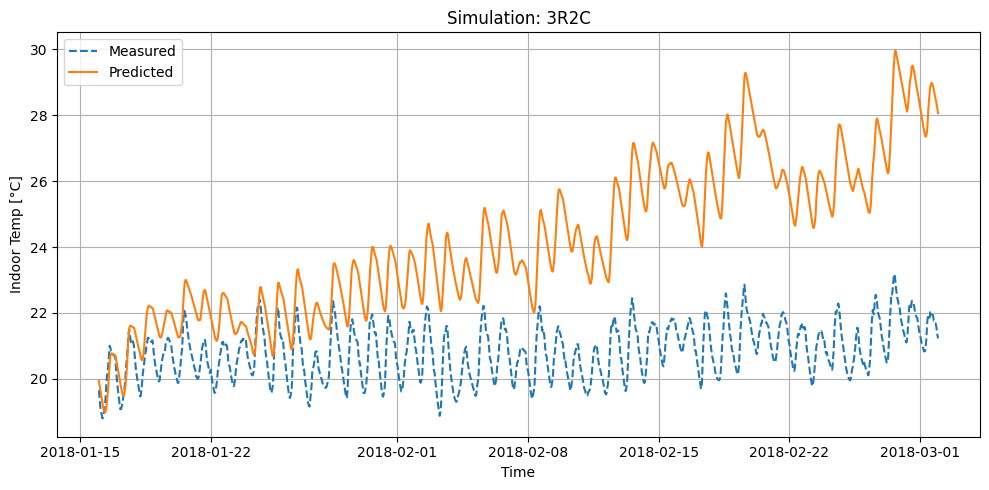

five last days Validation RMSE: 6.1778


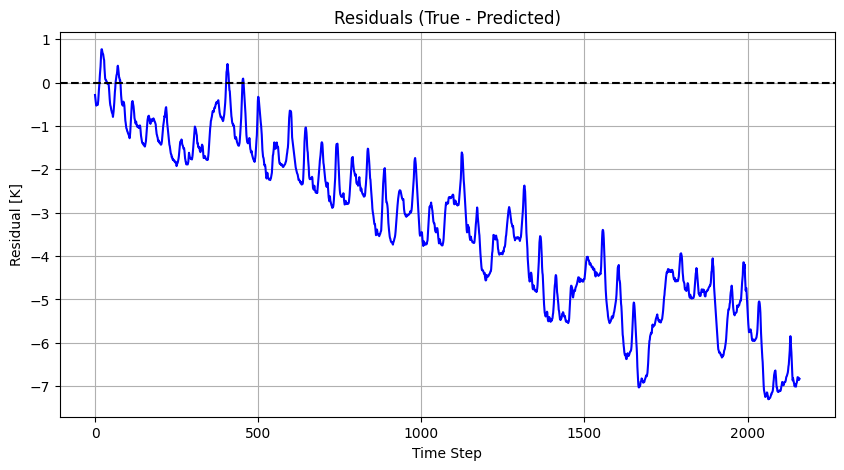

In [2]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:720]
val_cs2 = cs2.iloc[720:-240]
test_cs2= cs2.iloc[720:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

model, parameters, best_initialization, all_trials = train_greybox_model_with_validation_process(train_df=train_cs2, val_df=val_cs2,model_type="3R2C", bounds=bounds_cs2, num_trials=10)

last_index = max(model.T_in.index_set())
# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tin": model.T_in[last_index](), "Te": model.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
        val_df=test_cs2,
        param_dict=parameters,
        model_type="3R2C",
        initializations=initialize_validation,
        show_plot=True
    )

testing_rmse = np.sqrt(mean_squared_error(t_true[-240:], t_pred[-240:]))
print(f"five last days Validation RMSE: {testing_rmse:.4f}")

# --- Plot Residuals ---
plot_residual(t_pred=t_pred, t_true=t_true)

best_obj = all_trials['Objective'].min()
mean_obj = all_trials["Objective"].mean()
std_obj = all_trials["Objective"].std()
matches = (np.round(all_trials['Objective'], 5) == np.round(best_obj, 5))
n_matches = matches.sum()
n_total = len(all_trials)
success_rate = 100 * n_matches / n_total

# print(f" Best Objective achieved in {n_matches} out of {n_total} trials.")
# print(f" Success rate: {success_rate:.2f}%")
# print(f" Best Objective was equal to {best_obj}")
# print(f" Mean RMSE: {mean_obj:.2f}")
# print(f" RMSE Std. Dev.: {std_obj:.2f}")


 === Trial Result
Trial index #: 0
Trial RMSE Validation: 2.6220
Trial RMSE Training: 0.5398
Trial initialization: {'R_in_e': 0.8632403224497179, 'R_e_a': 0.6236748287007303, 'R_in_a': 0.33156712682779654, 'C_in': 32715616.792725794, 'C_e': 156180178.53611544, 'Ain': 204.86556035851845, 'Ae': 459.6519193923625, 'fh': 0.6375574713552131}
Trial parameters: {'R_in_e': 0.6460627662520996, 'R_e_a': 0.002987932024614237, 'R_in_a': 0.03535869942772563, 'C_in': 20281146.441933468, 'C_e': 412540747.87299496, 'Ain': 5.580603546074139, 'Ae': 0.00019576973173296102, 'fh': 0.006668526357174258, 'Objective': 0.5398215389316623, 'Solve_time': 30.01331615447998}
Solve Time: 30.01331615447998

 === Trial Result
Trial index #: 1
Trial RMSE Validation: 2.6185
Trial RMSE Training: 0.5399
Trial initialization: {'R_in_e': 0.8873255298337502, 'R_e_a': 0.4727427102367873, 'R_in_a': 0.1204746516923634, 'C_in': 356909148.8242745, 'C_e': 380631739.25983185, 'Ain': 353.6046783410629, 'Ae': 485.70934627465545, 'f

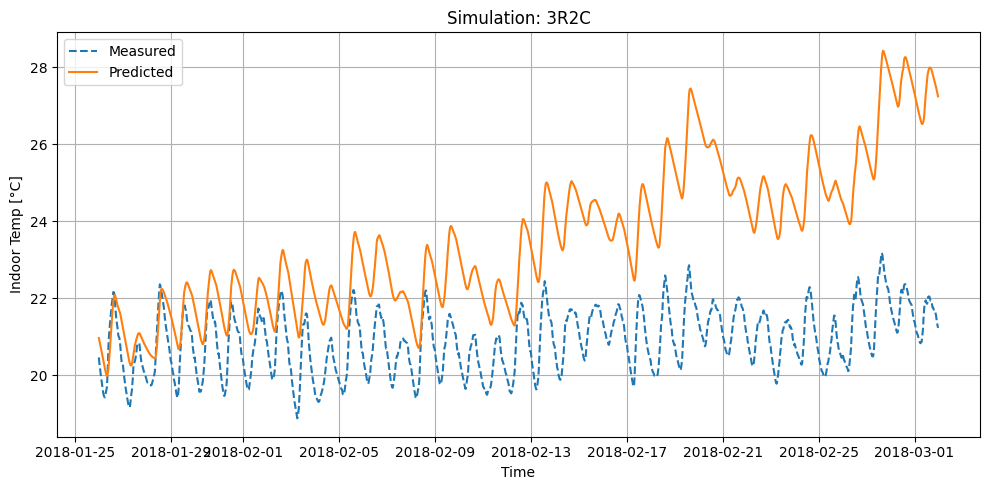

five last days Validation RMSE: 5.0166


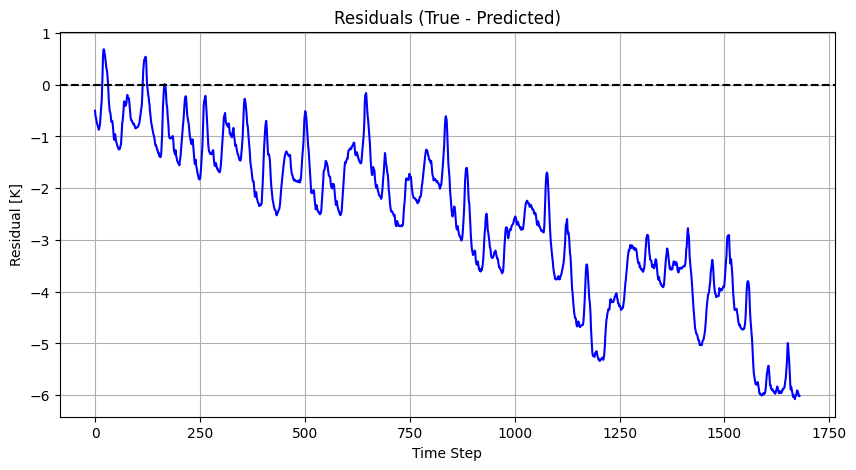

In [3]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:720+480]
val_cs2 = cs2.iloc[720+480:-240]
test_cs2= cs2.iloc[720+480:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

model, parameters, best_initialization, all_trials = train_greybox_model_with_validation_process(train_df=train_cs2, val_df=val_cs2,model_type="3R2C", bounds=bounds_cs2, num_trials=10)

last_index = max(model.T_in.index_set())
# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tin": model.T_in[last_index](), "Te": model.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
        val_df=test_cs2,
        param_dict=parameters,
        model_type="3R2C",
        initializations=initialize_validation,
        show_plot=True
    )

testing_rmse = np.sqrt(mean_squared_error(t_true[-240:], t_pred[-240:]))
print(f"five last days Validation RMSE: {testing_rmse:.4f}")

# --- Plot Residuals ---
plot_residual(t_pred=t_pred, t_true=t_true)

best_obj = all_trials['Objective'].min()
mean_obj = all_trials["Objective"].mean()
std_obj = all_trials["Objective"].std()
matches = (np.round(all_trials['Objective'], 5) == np.round(best_obj, 5))
n_matches = matches.sum()
n_total = len(all_trials)
success_rate = 100 * n_matches / n_total

# print(f" Best Objective achieved in {n_matches} out of {n_total} trials.")
# print(f" Success rate: {success_rate:.2f}%")
# print(f" Best Objective was equal to {best_obj}")
# print(f" Mean RMSE: {mean_obj:.2f}")
# print(f" RMSE Std. Dev.: {std_obj:.2f}")


 === Trial Result
Trial index #: 0
Trial RMSE Validation: 0.9341
Trial RMSE Training: 0.5394
Trial initialization: {'R_in_e': 0.368415349586534, 'R_e_a': 0.6326735247629859, 'R_in_a': 0.6338961810501338, 'C_in': 268351567.35330448, 'C_e': 46054595.25714974, 'Ain': 526.2405886909704, 'Ae': 202.09150885418708, 'fh': 0.18651851039985423}
Trial parameters: {'R_in_e': 0.9999472820039969, 'R_e_a': 0.006371534612736929, 'R_in_a': 0.0013034497792768088, 'C_in': 499984245.6643256, 'C_e': 499989898.1024531, 'Ain': 118.06198151670522, 'Ae': 0.0015428697875240088, 'fh': 0.20683873630143212, 'Objective': 0.5394264695438541, 'Solve_time': 104.71561479568481}
Solve Time: 104.71561479568481

 === Trial Result
Trial index #: 1
Trial RMSE Validation: 0.9341
Trial RMSE Training: 0.5394
Trial initialization: {'R_in_e': 0.041734366413209156, 'R_e_a': 0.5913020502450536, 'R_in_a': 0.6778867974804401, 'C_in': 9277326.63500022, 'C_e': 256534436.0913412, 'Ain': 142.6924157251234, 'Ae': 406.4588934406744, 'fh'

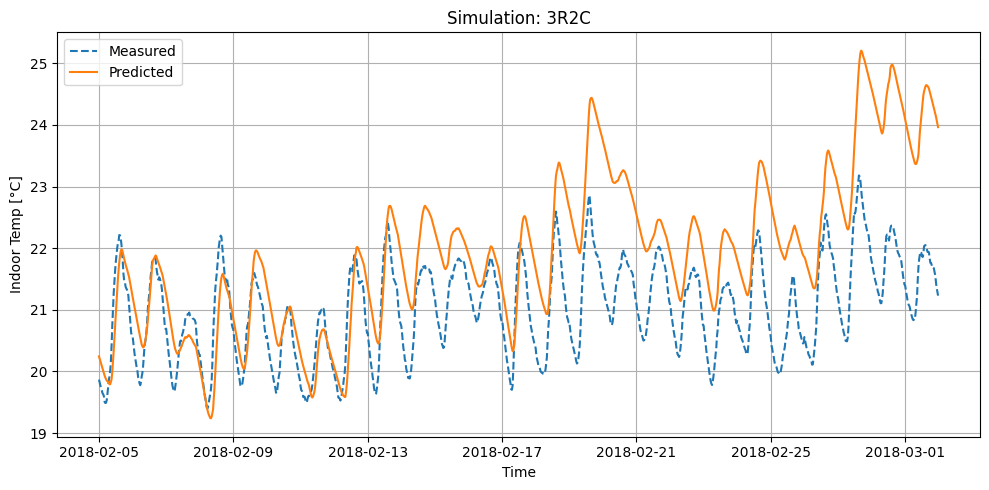

five last days Validation RMSE: 2.0769


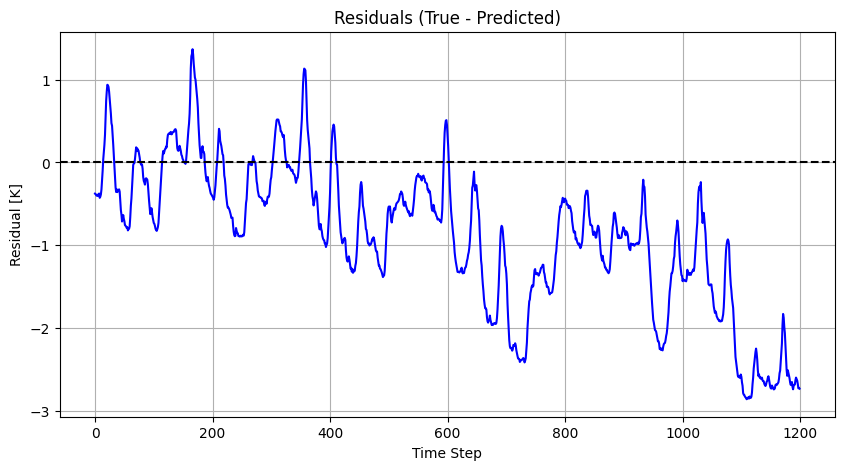

In [4]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:720+480+480]
val_cs2 = cs2.iloc[720+480+480:-240]
test_cs2= cs2.iloc[720+480+480:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

model, parameters, best_initialization, all_trials = train_greybox_model_with_validation_process(train_df=train_cs2, val_df=val_cs2,model_type="3R2C", bounds=bounds_cs2, num_trials=10)

last_index = max(model.T_in.index_set())
# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tin": model.T_in[last_index](), "Te": model.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
        val_df=test_cs2,
        param_dict=parameters,
        model_type="3R2C",
        initializations=initialize_validation,
        show_plot=True
    )

testing_rmse = np.sqrt(mean_squared_error(t_true[-240:], t_pred[-240:]))
print(f"five last days Validation RMSE: {testing_rmse:.4f}")

# --- Plot Residuals ---
plot_residual(t_pred=t_pred, t_true=t_true)

best_obj = all_trials['Objective'].min()
mean_obj = all_trials["Objective"].mean()
std_obj = all_trials["Objective"].std()
matches = (np.round(all_trials['Objective'], 5) == np.round(best_obj, 5))
n_matches = matches.sum()
n_total = len(all_trials)
success_rate = 100 * n_matches / n_total

# print(f" Best Objective achieved in {n_matches} out of {n_total} trials.")
# print(f" Success rate: {success_rate:.2f}%")
# print(f" Best Objective was equal to {best_obj}")
# print(f" Mean RMSE: {mean_obj:.2f}")
# print(f" RMSE Std. Dev.: {std_obj:.2f}")


 === Trial Result
Trial index #: 0
Trial RMSE Validation: 0.9352
Trial RMSE Training: 0.5379
Trial initialization: {'R_in_e': 0.9405181257685614, 'R_e_a': 0.9539746484255848, 'R_in_a': 0.914949525830228, 'C_in': 185709191.42746675, 'C_e': 8712851.647904847, 'Ain': 584.8407015984108, 'Ae': 269.75607062149317, 'fh': 0.9666548190436696}
Trial parameters: {'R_in_e': 0.9999970749286422, 'R_e_a': 0.0066548251356669955, 'R_in_a': 0.0014096781050792356, 'C_in': 499998879.1201112, 'C_e': 499998900.28863096, 'Ain': 104.67157734640273, 'Ae': 0.00042006827939447924, 'fh': 0.1898707000909754, 'Objective': 0.537877070097145, 'Solve_time': 1326.602324962616}
Solve Time: 1326.602324962616

 === Trial Result
Trial index #: 1
Trial RMSE Validation: 0.9352
Trial RMSE Training: 0.5379
Trial initialization: {'R_in_e': 0.9636563571121636, 'R_e_a': 0.8531564460118927, 'R_in_a': 0.2951544431775161, 'C_in': 193163766.5723607, 'C_e': 425717199.0869116, 'Ain': 199.6609315562544, 'Ae': 106.78051346296361, 'fh': 

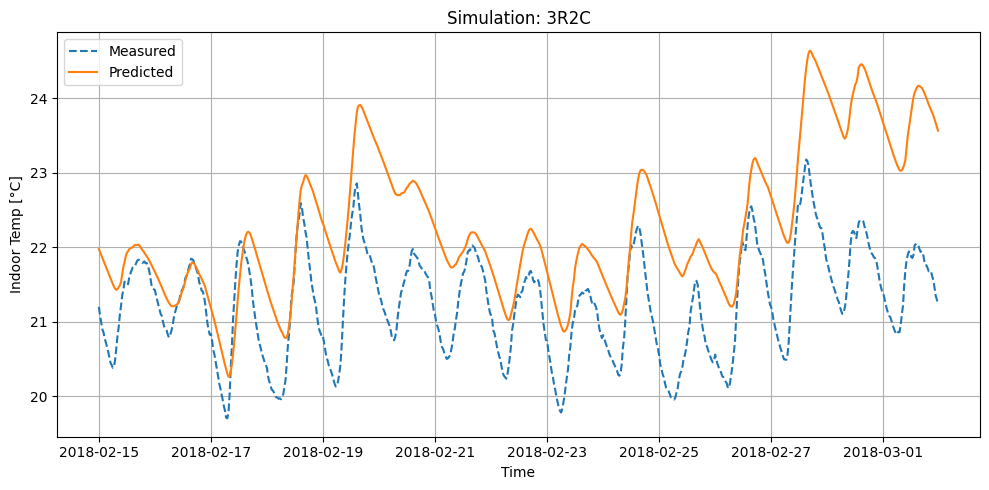

five last days Validation RMSE: 1.7203


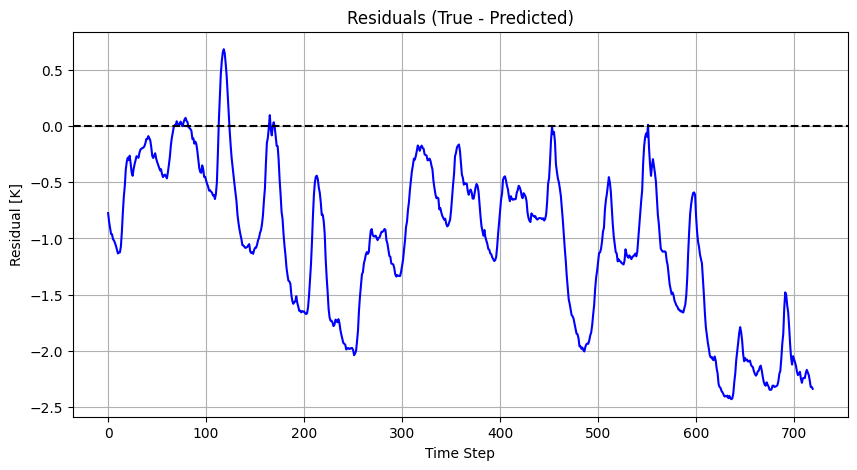

In [5]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:720+480+480+480]
val_cs2 = cs2.iloc[720+480+480+480:-240]
test_cs2= cs2.iloc[720+480+480+480:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

model, parameters, best_initialization, all_trials = train_greybox_model_with_validation_process(train_df=train_cs2, val_df=val_cs2,model_type="3R2C", bounds=bounds_cs2, num_trials=10)

last_index = max(model.T_in.index_set())
# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tin": model.T_in[last_index](), "Te": model.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
        val_df=test_cs2,
        param_dict=parameters,
        model_type="3R2C",
        initializations=initialize_validation,
        show_plot=True
    )

testing_rmse = np.sqrt(mean_squared_error(t_true[-240:], t_pred[-240:]))
print(f"five last days Validation RMSE: {testing_rmse:.4f}")

# --- Plot Residuals ---
plot_residual(t_pred=t_pred, t_true=t_true)

best_obj = all_trials['Objective'].min()
mean_obj = all_trials["Objective"].mean()
std_obj = all_trials["Objective"].std()
matches = (np.round(all_trials['Objective'], 5) == np.round(best_obj, 5))
n_matches = matches.sum()
n_total = len(all_trials)
success_rate = 100 * n_matches / n_total

# print(f" Best Objective achieved in {n_matches} out of {n_total} trials.")
# print(f" Success rate: {success_rate:.2f}%")
# print(f" Best Objective was equal to {best_obj}")
# print(f" Mean RMSE: {mean_obj:.2f}")
# print(f" RMSE Std. Dev.: {std_obj:.2f}")

## 4R3C Results


 === Trial Result
Trial index #: 0
Trial RMSE Validation: 3.4371
Trial RMSE Training: 0.2639
Trial initialization: {'R_in_e': 0.5496774380414143, 'R_e_a': 0.7148813267773623, 'R_in_a': 0.6605371793410135, 'C_in': 140687014.5760255, 'C_e': 477477775.05093384, 'Ain': 464.8750837286425, 'Ae': 349.2430976467772, 'fh': 0.6117207462343522}
Trial parameters: {'R_int_in': 0.004242844510287205, 'R_in_e': 0.30509922440940146, 'R_e_a': 0.0018681172947211874, 'R_in_a': 0.06421248986133703, 'C_int': 10676457.505166069, 'C_in': 1634987.6127163062, 'C_e': 499071594.710007, 'Aint': 1.0411436813070973, 'Ain': 0.8606624692885039, 'Ae': 0.0007243673540477146, 'fh_int': 0.003908651828907274, 'fh_in': 0.0028903614982826154, 'fh_e': 0.99320098667281, 'fh': 0.6117207462343522, 'Objective': 0.2638856375014869, 'Solve_time': 20.79780602455139}
Solve Time: 20.79780602455139

 === Trial Result
Trial index #: 1
Trial RMSE Validation: 10.5105
Trial RMSE Training: 0.2779
Trial initialization: {'R_in_e': 0.42018046

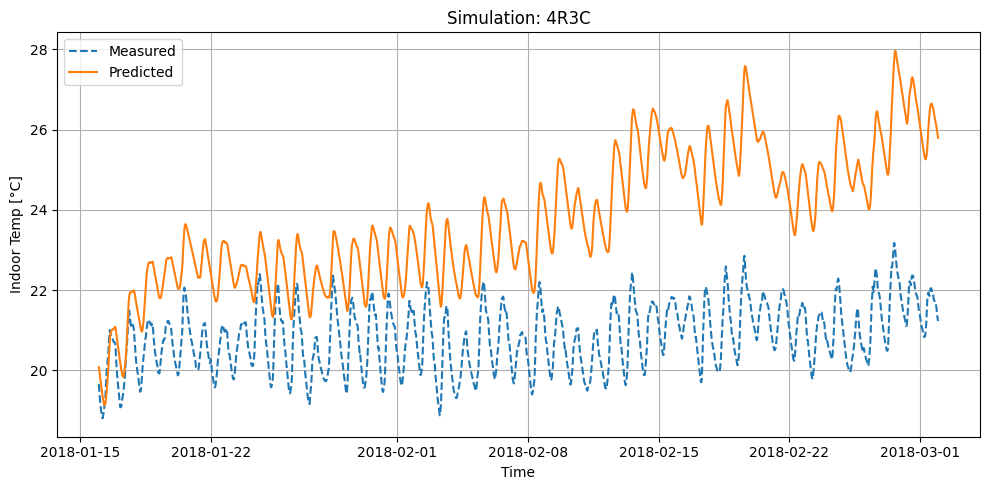

five last days Validation RMSE: 4.4712


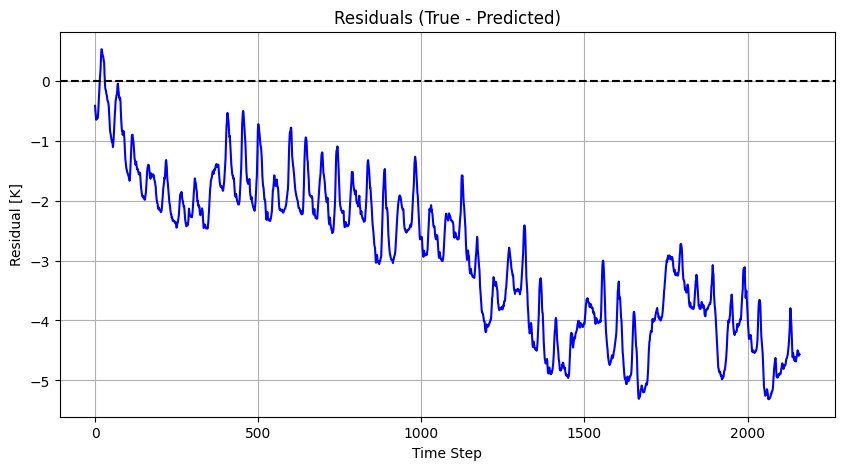

In [6]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:720]
val_cs2 = cs2.iloc[720:-240]
test_cs2= cs2.iloc[720:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

model, parameters, best_initialization, all_trials = train_greybox_model_with_validation_process(train_df=train_cs2, val_df=val_cs2,model_type="4R3C", bounds=bounds_cs2, num_trials=10)

last_index = max(model.T_in.index_set())
# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tint": model.T_int[last_index](), "Tin": model.T_in[last_index](), "Te": model.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
        val_df=test_cs2,
        param_dict=parameters,
        model_type="4R3C",
        initializations=initialize_validation,
        show_plot=True
    )

testing_rmse = np.sqrt(mean_squared_error(t_true[-240:], t_pred[-240:]))
print(f"five last days Validation RMSE: {testing_rmse:.4f}")

# --- Plot Residuals ---
plot_residual(t_pred=t_pred, t_true=t_true)

best_obj = all_trials['Objective'].min()
mean_obj = all_trials["Objective"].mean()
std_obj = all_trials["Objective"].std()
matches = (np.round(all_trials['Objective'], 5) == np.round(best_obj, 5))
n_matches = matches.sum()
n_total = len(all_trials)
success_rate = 100 * n_matches / n_total

# print(f" Best Objective achieved in {n_matches} out of {n_total} trials.")
# print(f" Success rate: {success_rate:.2f}%")
# print(f" Best Objective was equal to {best_obj}")
# print(f" Mean RMSE: {mean_obj:.2f}")
# print(f" RMSE Std. Dev.: {std_obj:.2f}")


 === Trial Result
Trial index #: 0
Trial RMSE Validation: 0.8491
Trial RMSE Training: 0.4041
Trial initialization: {'R_in_e': 0.10402074496709668, 'R_e_a': 0.902650353772887, 'R_in_a': 0.5057471200754093, 'C_in': 413402275.5877631, 'C_e': 160704750.91427526, 'Ain': 564.1796444002835, 'Ae': 245.1971186823549, 'fh': 0.01083765148029836}
Trial parameters: {'R_int_in': 0.01206028643541189, 'R_in_e': 0.9999992184230602, 'R_e_a': 0.0009999904371833853, 'R_in_a': 0.1085133140117992, 'C_int': 99999921.48849662, 'C_in': 2643221.4351662635, 'C_e': 1000001.0535495552, 'Aint': 5.029857974321861e-06, 'Ain': 1.034780896060931, 'Ae': 0.000307402148185952, 'fh_int': 0.005789116147493457, 'fh_in': 0.00027387378392200646, 'fh_e': 0.9939370100685845, 'fh': 0.01083765148029836, 'Objective': 0.4040780099104599, 'Solve_time': 248.70907592773438}
Solve Time: 248.70907592773438

 === Trial Result
Trial index #: 1
Trial RMSE Validation: 0.8491
Trial RMSE Training: 0.4041
Trial initialization: {'R_in_e': 0.905

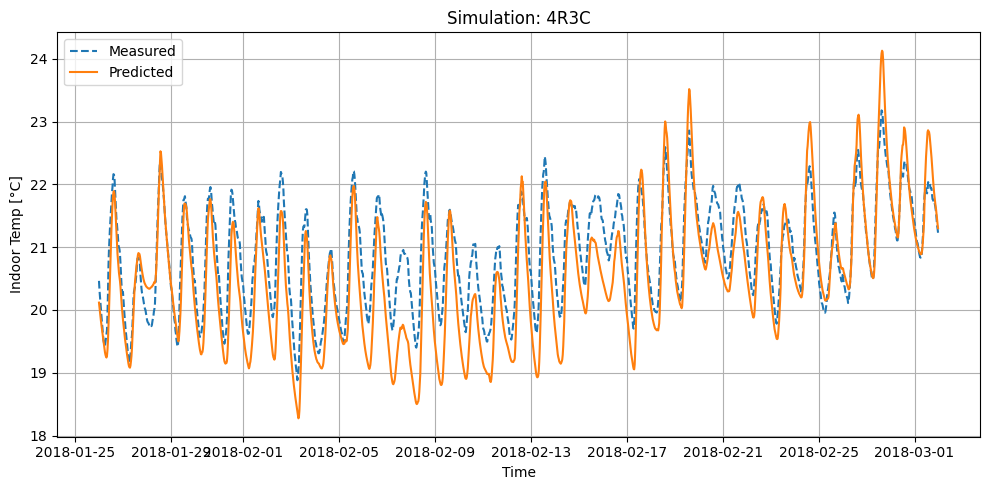

five last days Validation RMSE: 0.3364


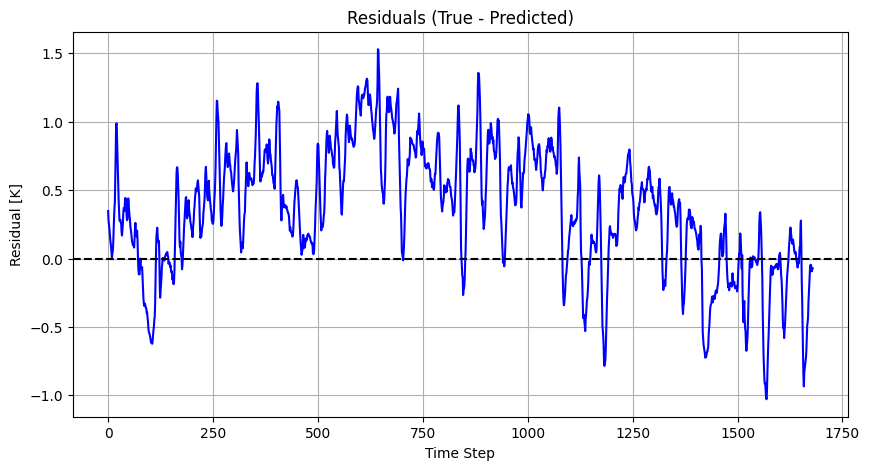

In [7]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:720+480]
val_cs2 = cs2.iloc[720+480:-240]
test_cs2= cs2.iloc[720+480:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

model, parameters, best_initialization, all_trials = train_greybox_model_with_validation_process(train_df=train_cs2, val_df=val_cs2,model_type="4R3C", bounds=bounds_cs2, num_trials=10)

last_index = max(model.T_in.index_set())
# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tint": model.T_int[last_index](), "Tin": model.T_in[last_index](), "Te": model.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
        val_df=test_cs2,
        param_dict=parameters,
        model_type="4R3C",
        initializations=initialize_validation,
        show_plot=True
    )

testing_rmse = np.sqrt(mean_squared_error(t_true[-240:], t_pred[-240:]))
print(f"five last days Validation RMSE: {testing_rmse:.4f}")

# --- Plot Residuals ---
plot_residual(t_pred=t_pred, t_true=t_true)

best_obj = all_trials['Objective'].min()
mean_obj = all_trials["Objective"].mean()
std_obj = all_trials["Objective"].std()
matches = (np.round(all_trials['Objective'], 5) == np.round(best_obj, 5))
n_matches = matches.sum()
n_total = len(all_trials)
success_rate = 100 * n_matches / n_total

# print(f" Best Objective achieved in {n_matches} out of {n_total} trials.")
# print(f" Success rate: {success_rate:.2f}%")
# print(f" Best Objective was equal to {best_obj}")
# print(f" Mean RMSE: {mean_obj:.2f}")
# print(f" RMSE Std. Dev.: {std_obj:.2f}")


 === Trial Result
Trial index #: 0
Trial RMSE Validation: 0.6495
Trial RMSE Training: 0.5241
Trial initialization: {'R_in_e': 0.6297692394971273, 'R_e_a': 0.6960529402956326, 'R_in_a': 0.45508652370300545, 'C_in': 314151481.9619477, 'C_e': 292572841.64962703, 'Ain': 567.729556493522, 'Ae': 28.631315070480426, 'fh': 0.2809631895922303}
Trial parameters: {'R_int_in': 0.37226275340896625, 'R_in_e': 0.049345199183782384, 'R_e_a': 0.9999833291321959, 'R_in_a': 0.0025230934411295085, 'C_int': 28500706.787210554, 'C_in': 275996582.447393, 'C_e': 287946815.8677647, 'Aint': 1.9311172673895966e-05, 'Ain': 71.4966230532551, 'Ae': 0.00012560893549240997, 'fh_int': 0.8540051871936529, 'fh_in': 0.11669944572187481, 'fh_e': 0.0292953670844722, 'fh': 0.2809631895922303, 'Objective': 0.5240890114221745, 'Solve_time': 750.4203560352325}
Solve Time: 750.4203560352325

 === Trial Result
Trial index #: 1
Trial RMSE Validation: 0.7947
Trial RMSE Training: 0.4046
Trial initialization: {'R_in_e': 0.950461072

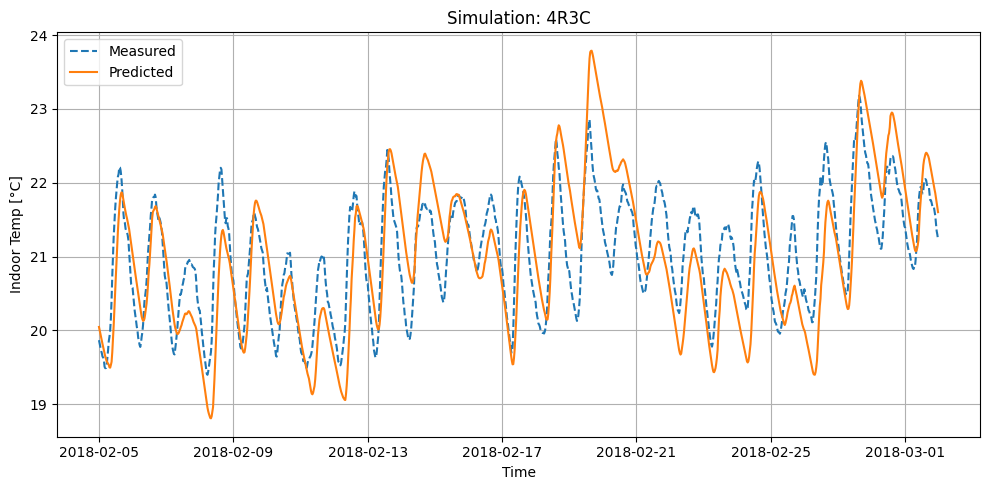

five last days Validation RMSE: 0.6314


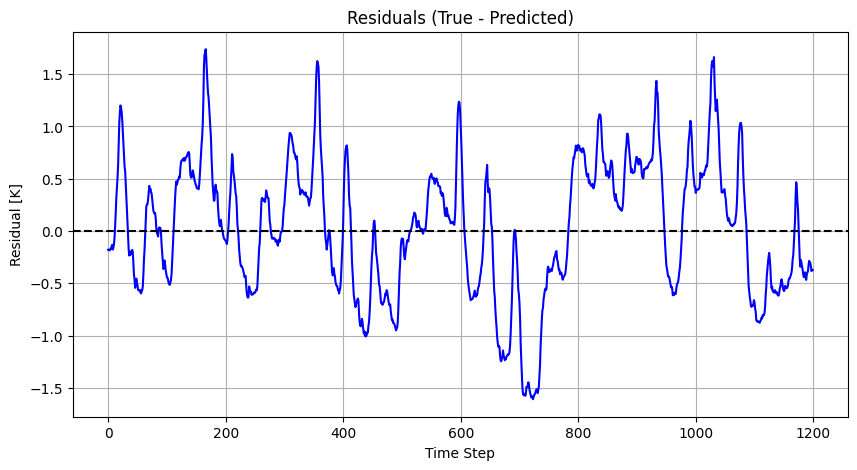

In [8]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:720+480+480]
val_cs2 = cs2.iloc[720+480+480:-240]
test_cs2= cs2.iloc[720+480+480:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

model, parameters, best_initialization, all_trials = train_greybox_model_with_validation_process(train_df=train_cs2, val_df=val_cs2,model_type="4R3C", bounds=bounds_cs2, num_trials=10)

last_index = max(model.T_in.index_set())
# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tint": model.T_int[last_index](), "Tin": model.T_in[last_index](), "Te": model.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
        val_df=test_cs2,
        param_dict=parameters,
        model_type="4R3C",
        initializations=initialize_validation,
        show_plot=True
    )

testing_rmse = np.sqrt(mean_squared_error(t_true[-240:], t_pred[-240:]))
print(f"five last days Validation RMSE: {testing_rmse:.4f}")

# --- Plot Residuals ---
plot_residual(t_pred=t_pred, t_true=t_true)

best_obj = all_trials['Objective'].min()
mean_obj = all_trials["Objective"].mean()
std_obj = all_trials["Objective"].std()
matches = (np.round(all_trials['Objective'], 5) == np.round(best_obj, 5))
n_matches = matches.sum()
n_total = len(all_trials)
success_rate = 100 * n_matches / n_total

# print(f" Best Objective achieved in {n_matches} out of {n_total} trials.")
# print(f" Success rate: {success_rate:.2f}%")
# print(f" Best Objective was equal to {best_obj}")
# print(f" Mean RMSE: {mean_obj:.2f}")
# print(f" RMSE Std. Dev.: {std_obj:.2f}")


 === Trial Result
Trial index #: 0
Trial RMSE Validation: 0.7208
Trial RMSE Training: 0.5252
Trial initialization: {'R_in_e': 0.7043756883311243, 'R_e_a': 0.21375119734740183, 'R_in_a': 0.137235104111183, 'C_in': 8257788.168273082, 'C_e': 175943191.8444919, 'Ain': 371.64818372665013, 'Ae': 247.11380918842687, 'fh': 0.43747492202372906}
Trial parameters: {'R_int_in': 0.012982868839616952, 'R_in_e': 0.9999974702020412, 'R_e_a': 0.0045476475457328375, 'R_in_a': 0.0018784198959116475, 'C_int': 97918884.93027252, 'C_in': 383278352.6412184, 'C_e': 272615033.14338666, 'Aint': 1.6316877804157773e-06, 'Ain': 84.50333612949126, 'Ae': 0.00045946893361670205, 'fh_int': -3.847748567987686e-09, 'fh_in': 0.16281777811099174, 'fh_e': 0.8371822257367569, 'fh': 0.43747492202372906, 'Objective': 0.5251561790476111, 'Solve_time': 784.7911853790283}
Solve Time: 784.7911853790283

 === Trial Result
Trial index #: 1
Trial RMSE Validation: 0.3951
Trial RMSE Training: 0.4251
Trial initialization: {'R_in_e': 0

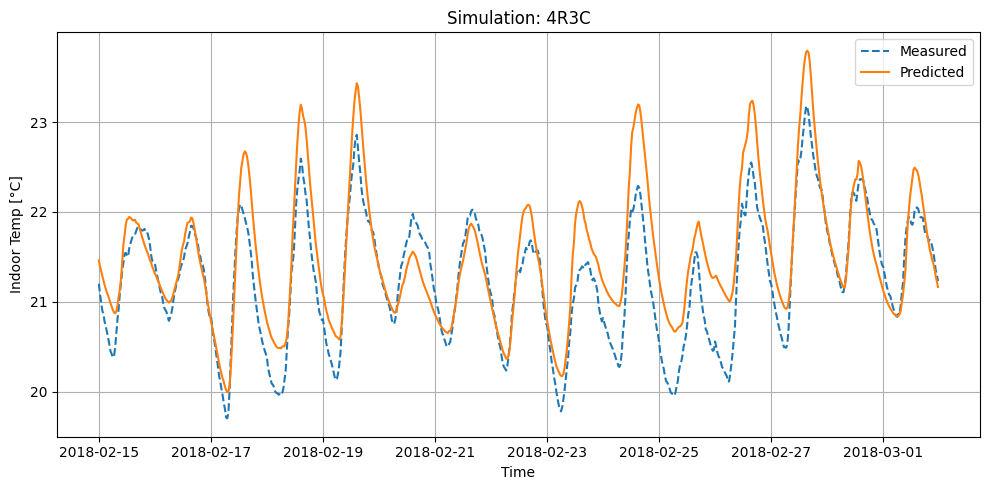

five last days Validation RMSE: 0.4661


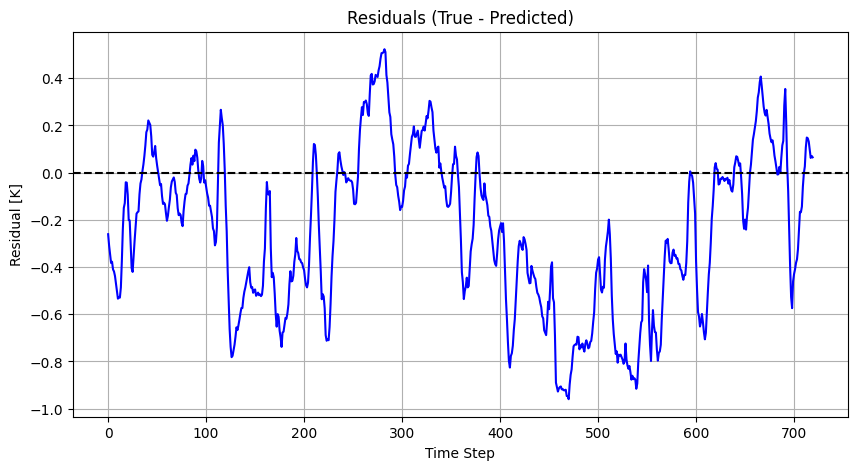

In [9]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:720+480+480+480]
val_cs2 = cs2.iloc[720+480+480+480:-240]
test_cs2= cs2.iloc[720+480+480+480:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

model, parameters, best_initialization, all_trials = train_greybox_model_with_validation_process(train_df=train_cs2, val_df=val_cs2,model_type="4R3C", bounds=bounds_cs2, num_trials=10)

last_index = max(model.T_in.index_set())
# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tint": model.T_int[last_index](), "Tin": model.T_in[last_index](), "Te": model.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
        val_df=test_cs2,
        param_dict=parameters,
        model_type="4R3C",
        initializations=initialize_validation,
        show_plot=True
    )

testing_rmse = np.sqrt(mean_squared_error(t_true[-240:], t_pred[-240:]))
print(f"five last days Validation RMSE: {testing_rmse:.4f}")

# --- Plot Residuals ---
plot_residual(t_pred=t_pred, t_true=t_true)

best_obj = all_trials['Objective'].min()
mean_obj = all_trials["Objective"].mean()
std_obj = all_trials["Objective"].std()
matches = (np.round(all_trials['Objective'], 5) == np.round(best_obj, 5))
n_matches = matches.sum()
n_total = len(all_trials)
success_rate = 100 * n_matches / n_total

# print(f" Best Objective achieved in {n_matches} out of {n_total} trials.")
# print(f" Success rate: { success_rate:.2f}%")
# print(f" Best Objective was equal to {best_obj}")
# print(f" Mean RMSE: {mean_obj:.2f}")
# print(f" RMSE Std. Dev.: {std_obj:.2f}")

In [4]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:240+480]
val_cs2 = cs2.iloc[240+480:-240]
test_cs2= cs2.iloc[240+480:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

best_rmse = np.inf
best_params = None
best_initialization = None
best_initialization_validation = None
best_model = None
best_trial_index = -1
all_trials = pd.DataFrame()
solve_time = 0 
param_names = list(bounds_cs2.keys())

for i in range(10):
    model_3r2c_cs2_5days, all_trials_3r2c_cs2_5days, best_initialization_5days, parameters_5days = run_case_study(train_df=train_cs2, surface_area=cs2_surface_area, label="Case Study 2",model_type="3R2C", bounds=bounds_cs2, trials=1)
    last_index = max(model_3r2c_cs2_5days.T_in.index_set())
    # --- Validation Initialization (from last training value) ---
    initialize_validation = {"Tin": model_3r2c_cs2_5days.T_in[last_index](), "Te": model_3r2c_cs2_5days.T_e[last_index]()}

    # --- Run Simulation and Validation ---
    validation, t_pred_3r2c_cs2_5days, t_true_3r2c_cs2_5days = simulate_and_evaluate(
        val_df=val_cs2,
        param_dict=parameters_5days,
        model_type="3R2C",
        initializations=initialize_validation,
        show_plot=False
    )
    # --- Results ---   
    print(f"Validation RMSE: {validation['RMSE']:.4f}")
    
    if validation['RMSE'] < best_rmse:
        best_rmse=validation['RMSE']
        best_params=parameters_5days
        best_initialization=best_initialization
        best_model=model_3r2c_cs2_5days
        best_trial_index=i
        all_trials=all_trials_3r2c_cs2_5days
        best_initialization_validation = initialize_validation
        

print(f"Best RMSE: {best_rmse:.4f}")

# --- Run Simulation and Validation ---
validation, t_pred_3r2c_cs2_5days, t_true_3r2c_cs2_5days = simulate_and_evaluate(
        val_df=test_cs2,
        param_dict=best_params,
        model_type="3R2C",
        initializations=best_initialization_validation,
        show_plot=False
    )

rmse_3r2c_5days = np.sqrt(mean_squared_error(t_true_3r2c_cs2_5days[-240:], t_pred_3r2c_cs2_5days[-240:]))
print(f"five last days Validation RMSE: {rmse_3r2c_5days:.4f}")

# --- Plot Residuals ---
# plot_residual(t_pred=t_pred_3r2c_cs2_5days, t_true=t_true_3r2c_cs2_5days)


[Trial 1] RMSE = 0.5052, Init: {'R_in_e': 0.8632403224497179, 'R_e_a': 0.6236748287007303, 'R_in_a': 0.33156712682779654, 'C_in': 32715616.792725794, 'C_e': 156180178.53611544, 'Ain': 204.86556035851845, 'Ae': 459.6519193923625, 'fh': 0.6375574713552131}
 parameters: {'R_in_e': 0.9999069878820477, 'R_e_a': 0.08828524434897574, 'R_in_a': 0.001289498859118516, 'C_in': 499984964.88703287, 'C_e': 4658482.518597364, 'Ain': 149.3971901888823, 'Ae': 629.9888958044638, 'fh': 0.2508151852343611, 'Objective': 0.505175812908138, 'Solve_time': 10.71288800239563}

=== Best result ===
Best Trial #: 1
Best RMSE: 0.5052
Best initialization: {'R_in_e': 0.8632403224497179, 'R_e_a': 0.6236748287007303, 'R_in_a': 0.33156712682779654, 'C_in': 32715616.792725794, 'C_e': 156180178.53611544, 'Ain': 204.86556035851845, 'Ae': 459.6519193923625, 'fh': 0.6375574713552131}
Best parameters: {'R_in_e': 0.9999069878820477, 'R_e_a': 0.08828524434897574, 'R_in_a': 0.001289498859118516, 'C_in': 499984964.88703287, 'C_e'

In [5]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:240+480+480]
val_cs2 = cs2.iloc[240+480+480:-240]
test_cs2= cs2.iloc[240+480+480:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

best_rmse = np.inf
best_params = None
best_initialization = None
best_initialization_validation = None
best_model = None
best_trial_index = -1
all_trials = pd.DataFrame()
solve_time = 0 
param_names = list(bounds_cs2.keys())

for i in range(10):
    model_3r2c_cs2_5days, all_trials_3r2c_cs2_5days, best_initialization_5days, parameters_5days = run_case_study(train_df=train_cs2, surface_area=cs2_surface_area, label="Case Study 2",model_type="3R2C", bounds=bounds_cs2, trials=1)
    last_index = max(model_3r2c_cs2_5days.T_in.index_set())
    # --- Validation Initialization (from last training value) ---
    initialize_validation = {"Tin": model_3r2c_cs2_5days.T_in[last_index](), "Te": model_3r2c_cs2_5days.T_e[last_index]()}

    # --- Run Simulation and Validation ---
    validation, t_pred_3r2c_cs2_5days, t_true_3r2c_cs2_5days = simulate_and_evaluate(
        val_df=val_cs2,
        param_dict=parameters_5days,
        model_type="3R2C",
        initializations=initialize_validation,
        show_plot=False
    )
    # --- Results ---   
    print(f"Validation RMSE: {validation['RMSE']:.4f}")
    
    if validation['RMSE'] < best_rmse:
        best_rmse=validation['RMSE']
        best_params=parameters_5days
        best_initialization=best_initialization
        best_model=model_3r2c_cs2_5days
        best_trial_index=i
        all_trials=all_trials_3r2c_cs2_5days
        best_initialization_validation = initialize_validation
        

print(f"Best RMSE: {best_rmse:.4f}")

# --- Run Simulation and Validation ---
validation, t_pred_3r2c_cs2_5days, t_true_3r2c_cs2_5days = simulate_and_evaluate(
        val_df=test_cs2,
        param_dict=best_params,
        model_type="3R2C",
        initializations=best_initialization_validation,
        show_plot=True
    )

rmse_3r2c_5days = np.sqrt(mean_squared_error(t_true_3r2c_cs2_5days[-240:], t_pred_3r2c_cs2_5days[-240:]))
print(f"five last days Validation RMSE: {rmse_3r2c_5days:.4f}")

# --- Plot Residuals ---
# plot_residual(t_pred=t_pred_3r2c_cs2_5days, t_true=t_true_3r2c_cs2_5days)


[Trial 1] RMSE = 0.5394, Init: {'R_in_e': 0.368415349586534, 'R_e_a': 0.6326735247629859, 'R_in_a': 0.6338961810501338, 'C_in': 268351567.35330448, 'C_e': 46054595.25714974, 'Ain': 526.2405886909704, 'Ae': 202.09150885418708, 'fh': 0.18651851039985423}
 parameters: {'R_in_e': 0.023007489773113097, 'R_e_a': 0.003180186599628848, 'R_in_a': 0.0016564922115370067, 'C_in': 432688339.51004654, 'C_e': 422811591.78262717, 'Ain': 119.1056246126172, 'Ae': 0.00017344361003709122, 'fh': 0.14223119404466877, 'Objective': 0.5394485100722372, 'Solve_time': 29.351923942565918}

=== Best result ===
Best Trial #: 1
Best RMSE: 0.5394
Best initialization: {'R_in_e': 0.368415349586534, 'R_e_a': 0.6326735247629859, 'R_in_a': 0.6338961810501338, 'C_in': 268351567.35330448, 'C_e': 46054595.25714974, 'Ain': 526.2405886909704, 'Ae': 202.09150885418708, 'fh': 0.18651851039985423}
Best parameters: {'R_in_e': 0.023007489773113097, 'R_e_a': 0.003180186599628848, 'R_in_a': 0.0016564922115370067, 'C_in': 432688339.51

[Trial 1] RMSE = 0.5394, Init: {'R_in_e': 0.9405181257685614, 'R_e_a': 0.9539746484255848, 'R_in_a': 0.914949525830228, 'C_in': 185709191.42746675, 'C_e': 8712851.647904847, 'Ain': 584.8407015984108, 'Ae': 269.75607062149317, 'fh': 0.9666548190436696}
 parameters: {'R_in_e': 0.9999472820118296, 'R_e_a': 0.006371534612786795, 'R_in_a': 0.0013034497792754618, 'C_in': 499984245.66445196, 'C_e': 499989898.09816426, 'Ain': 118.06198151674772, 'Ae': 0.0015428701526561674, 'fh': 0.2068387363014751, 'Objective': 0.5394264695438399, 'Solve_time': 153.48811173439026}

=== Best result ===
Best Trial #: 1
Best RMSE: 0.5394
Best initialization: {'R_in_e': 0.9405181257685614, 'R_e_a': 0.9539746484255848, 'R_in_a': 0.914949525830228, 'C_in': 185709191.42746675, 'C_e': 8712851.647904847, 'Ain': 584.8407015984108, 'Ae': 269.75607062149317, 'fh': 0.9666548190436696}
Best parameters: {'R_in_e': 0.9999472820118296, 'R_e_a': 0.006371534612786795, 'R_in_a': 0.0013034497792754618, 'C_in': 499984245.66445196,

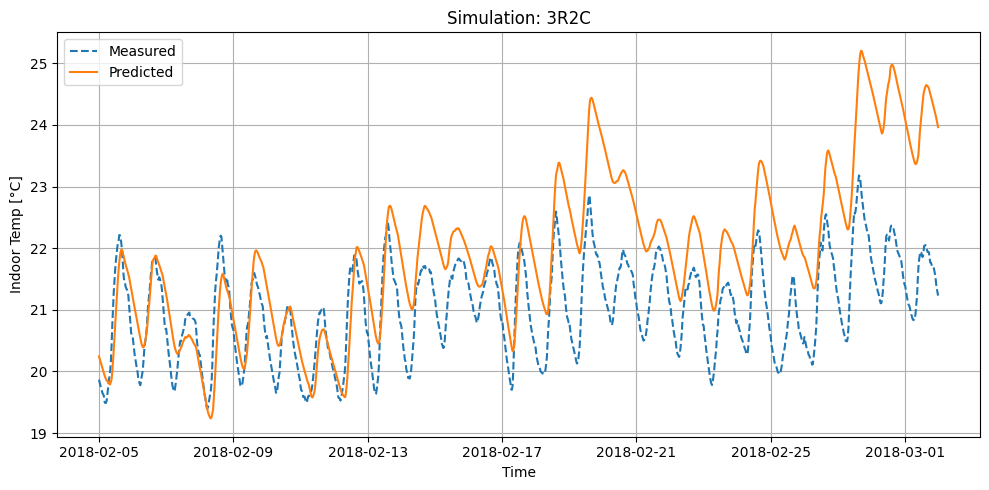

five last days Validation RMSE: 2.0769


In [6]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:240+480+480+480]
val_cs2 = cs2.iloc[240+480+480+480:-240]
test_cs2= cs2.iloc[240+480+480+480:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

best_rmse = np.inf
best_params = None
best_initialization = None
best_initialization_validation = None
best_model = None
best_trial_index = -1
all_trials = pd.DataFrame()
solve_time = 0 
param_names = list(bounds_cs2.keys())

for i in range(10):
    model_3r2c_cs2_5days, all_trials_3r2c_cs2_5days, best_initialization_5days, parameters_5days = run_case_study(train_df=train_cs2, surface_area=cs2_surface_area, label="Case Study 2",model_type="3R2C", bounds=bounds_cs2, trials=1)
    last_index = max(model_3r2c_cs2_5days.T_in.index_set())
    # --- Validation Initialization (from last training value) ---
    initialize_validation = {"Tin": model_3r2c_cs2_5days.T_in[last_index](), "Te": model_3r2c_cs2_5days.T_e[last_index]()}

    # --- Run Simulation and Validation ---
    validation, t_pred_3r2c_cs2_5days, t_true_3r2c_cs2_5days = simulate_and_evaluate(
        val_df=val_cs2,
        param_dict=parameters_5days,
        model_type="3R2C",
        initializations=initialize_validation,
        show_plot=False
    )
    # --- Results ---   
    print(f"Validation RMSE: {validation['RMSE']:.4f}")
    
    if validation['RMSE'] < best_rmse:
        best_rmse=validation['RMSE']
        best_params=parameters_5days
        best_initialization=best_initialization
        best_model=model_3r2c_cs2_5days
        best_trial_index=i
        all_trials=all_trials_3r2c_cs2_5days
        best_initialization_validation = initialize_validation
        

print(f"Best RMSE: {best_rmse:.4f}")

# --- Run Simulation and Validation ---
validation, t_pred_3r2c_cs2_5days, t_true_3r2c_cs2_5days = simulate_and_evaluate(
        val_df=test_cs2,
        param_dict=best_params,
        model_type="3R2C",
        initializations=best_initialization_validation,
        show_plot=True
    )

rmse_3r2c_5days = np.sqrt(mean_squared_error(t_true_3r2c_cs2_5days[-240:], t_pred_3r2c_cs2_5days[-240:]))
print(f"five last days Validation RMSE: {rmse_3r2c_5days:.4f}")

# --- Plot Residuals ---
# plot_residual(t_pred=t_pred_3r2c_cs2_5days, t_true=t_true_3r2c_cs2_5days)


[Trial 1] RMSE = 0.5379, Init: {'R_in_e': 0.5496774380414143, 'R_e_a': 0.7148813267773623, 'R_in_a': 0.6605371793410135, 'C_in': 140687014.5760255, 'C_e': 477477775.05093384, 'Ain': 464.8750837286425, 'Ae': 349.2430976467772, 'fh': 0.6117207462343522}
 parameters: {'R_in_e': 0.9999970501614074, 'R_e_a': 0.006654825215361658, 'R_in_a': 0.0014096781037597555, 'C_in': 499998873.81787336, 'C_e': 499998900.3612071, 'Ain': 104.67157703271788, 'Ae': 0.00042004901579287843, 'fh': 0.1898706992936557, 'Objective': 0.537877070109066, 'Solve_time': 294.71268463134766}

=== Best result ===
Best Trial #: 1
Best RMSE: 0.5379
Best initialization: {'R_in_e': 0.5496774380414143, 'R_e_a': 0.7148813267773623, 'R_in_a': 0.6605371793410135, 'C_in': 140687014.5760255, 'C_e': 477477775.05093384, 'Ain': 464.8750837286425, 'Ae': 349.2430976467772, 'fh': 0.6117207462343522}
Best parameters: {'R_in_e': 0.9999970501614074, 'R_e_a': 0.006654825215361658, 'R_in_a': 0.0014096781037597555, 'C_in': 499998873.81787336, 

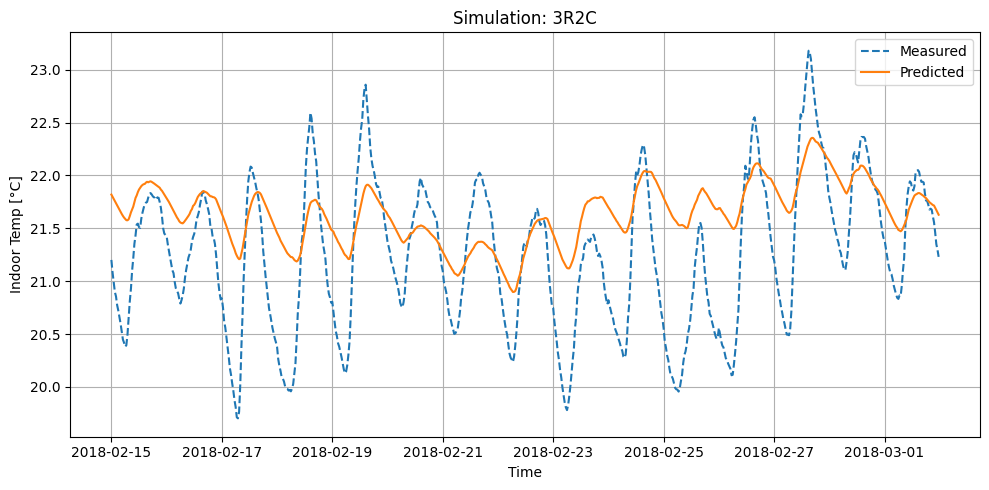

five last days Validation RMSE: 0.7419


In [7]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:240+480+480+480+480]
val_cs2 = cs2.iloc[240+480+480+480+480:-240]
test_cs2= cs2.iloc[240+480+480+480+480:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

best_rmse = np.inf
best_params = None
best_initialization = None
best_initialization_validation = None
best_model = None
best_trial_index = -1
all_trials = pd.DataFrame()
solve_time = 0 
param_names = list(bounds_cs2.keys())

for i in range(10):
    model_3r2c_cs2_5days, all_trials_3r2c_cs2_5days, best_initialization_5days, parameters_5days = run_case_study(train_df=train_cs2, surface_area=cs2_surface_area, label="Case Study 2",model_type="3R2C", bounds=bounds_cs2, trials=1)
    last_index = max(model_3r2c_cs2_5days.T_in.index_set())
    # --- Validation Initialization (from last training value) ---
    initialize_validation = {"Tin": model_3r2c_cs2_5days.T_in[last_index](), "Te": model_3r2c_cs2_5days.T_e[last_index]()}

    # --- Run Simulation and Validation ---
    validation, t_pred_3r2c_cs2_5days, t_true_3r2c_cs2_5days = simulate_and_evaluate(
        val_df=val_cs2,
        param_dict=parameters_5days,
        model_type="3R2C",
        initializations=initialize_validation,
        show_plot=False
    )
    # --- Results ---   
    print(f"Validation RMSE: {validation['RMSE']:.4f}")
    
    if validation['RMSE'] < best_rmse:
        best_rmse=validation['RMSE']
        best_params=parameters_5days
        best_initialization=best_initialization
        best_model=model_3r2c_cs2_5days
        best_trial_index=i
        all_trials=all_trials_3r2c_cs2_5days
        best_initialization_validation = initialize_validation
        

print(f"Best RMSE: {best_rmse:.4f}")

# --- Run Simulation and Validation ---
validation, t_pred_3r2c_cs2_5days, t_true_3r2c_cs2_5days = simulate_and_evaluate(
        val_df=test_cs2,
        param_dict=best_params,
        model_type="3R2C",
        initializations=best_initialization_validation,
        show_plot=True
    )

rmse_3r2c_5days = np.sqrt(mean_squared_error(t_true_3r2c_cs2_5days[-240:], t_pred_3r2c_cs2_5days[-240:]))
print(f"five last days Validation RMSE: {rmse_3r2c_5days:.4f}")

# --- Plot Residuals ---
# plot_residual(t_pred=t_pred_3r2c_cs2_5days, t_true=t_true_3r2c_cs2_5days)


[Trial 1] RMSE = 0.5048, Init: {'R_in_e': 0.6015138967314656, 'R_e_a': 0.7083645052182495, 'R_in_a': 0.021563909801506645, 'C_in': 484985016.22883517, 'C_e': 416388877.75941044, 'Ain': 133.77371849340292, 'Ae': 114.54981115797668, 'fh': 0.18340450985343382}
 parameters: {'R_in_e': 0.02347162700767831, 'R_e_a': 0.004009460352521583, 'R_in_a': 0.0016263660954338325, 'C_in': 387332068.04729784, 'C_e': 225637858.0262265, 'Ain': 118.8051236166503, 'Ae': 0.001285399238517785, 'fh': 0.1937033988863942, 'Objective': 0.5048190515200269, 'Solve_time': 5.514847993850708}

=== Best result ===
Best Trial #: 1
Best RMSE: 0.5048
Best initialization: {'R_in_e': 0.6015138967314656, 'R_e_a': 0.7083645052182495, 'R_in_a': 0.021563909801506645, 'C_in': 484985016.22883517, 'C_e': 416388877.75941044, 'Ain': 133.77371849340292, 'Ae': 114.54981115797668, 'fh': 0.18340450985343382}
Best parameters: {'R_in_e': 0.02347162700767831, 'R_e_a': 0.004009460352521583, 'R_in_a': 0.0016263660954338325, 'C_in': 387332068

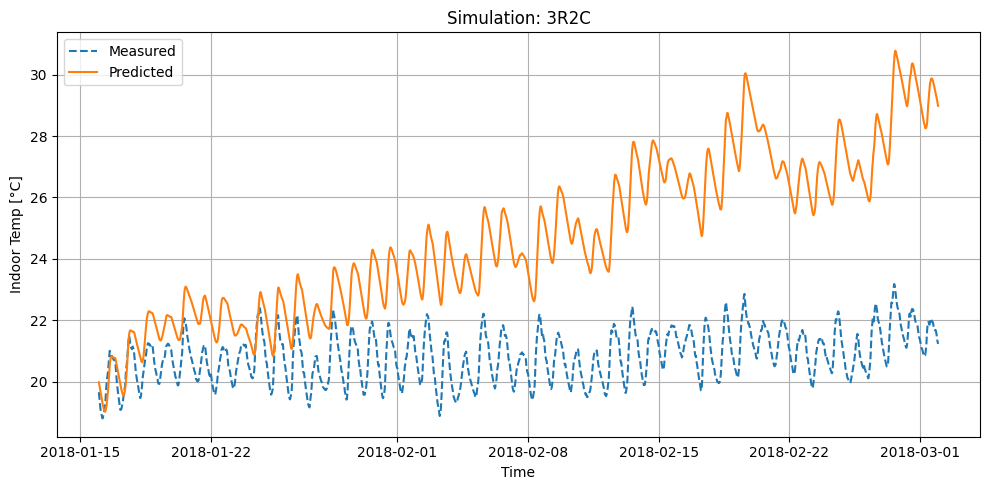

Validation RMSE: 4.4105
five last days Validation RMSE: 7.0278


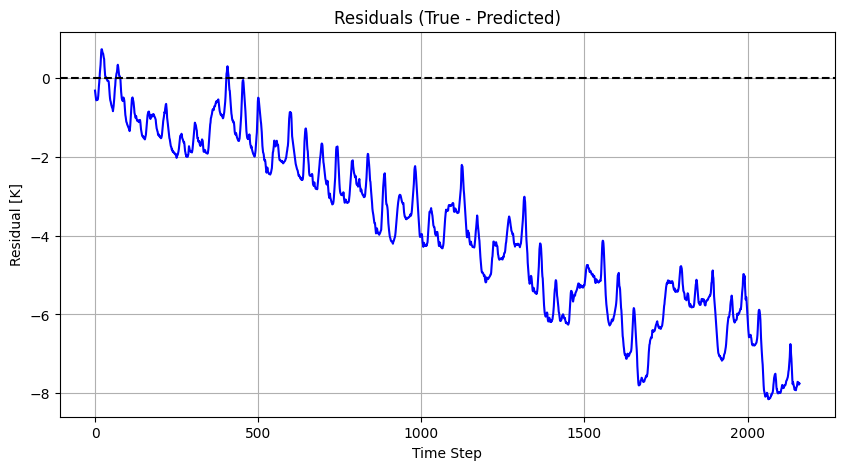

In [4]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:720]
val_cs2 = cs2.iloc[720:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

model_3r2c_cs2_15days, all_trials_3r2c_cs2_15days, best_initialization_15days, parameters_15days = run_case_study(train_df=train_cs2, surface_area=cs2_surface_area, label="Case Study 2",model_type="3R2C", bounds=bounds_cs2, trials=1)

last_index = max(model_3r2c_cs2_15days.T_in.index_set())

# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tin": model_3r2c_cs2_15days.T_in[last_index](), "Te": model_3r2c_cs2_15days.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred_3r2c_cs2_15days, t_true_3r2c_cs2_15days = simulate_and_evaluate(
    val_df=val_cs2,
    param_dict=parameters_15days,
    model_type="3R2C",
    initializations=initialize_validation,
    show_plot=True
)

# --- Results ---
print(f"Validation RMSE: {validation['RMSE']:.4f}")
rmse_3r2c_15days = np.sqrt(mean_squared_error(t_true_3r2c_cs2_15days[-240:], t_pred_3r2c_cs2_15days[-240:]))
print(f"five last days Validation RMSE: {rmse_3r2c_15days:.4f}")
# --- Plot Residuals ---
plot_residual(t_pred=t_pred_3r2c_cs2_15days, t_true=t_true_3r2c_cs2_15days)


[Trial 1] RMSE = 0.5387, Init: {'R_in_e': 0.3049380007165782, 'R_e_a': 0.5252316752006057, 'R_in_a': 0.43251307362347363, 'C_in': 146323340.9588229, 'C_e': 306314594.4664674, 'Ain': 87.88121826140029, 'Ae': 184.0511993627226, 'fh': 0.3663618432936917}
 parameters: {'R_in_e': 0.01291164851181001, 'R_e_a': 0.002618067347949511, 'R_in_a': 0.0014342678667150707, 'C_in': 499997668.6773506, 'C_e': 499999757.9048577, 'Ain': 137.840975434318, 'Ae': 0.00015516561444011746, 'fh': 0.1638480491548354, 'Objective': 0.5386869415104878, 'Solve_time': 77.62531900405884}

=== Best result ===
Best Trial #: 1
Best RMSE: 0.5387
Best initialization: {'R_in_e': 0.3049380007165782, 'R_e_a': 0.5252316752006057, 'R_in_a': 0.43251307362347363, 'C_in': 146323340.9588229, 'C_e': 306314594.4664674, 'Ain': 87.88121826140029, 'Ae': 184.0511993627226, 'fh': 0.3663618432936917}
Best parameters: {'R_in_e': 0.01291164851181001, 'R_e_a': 0.002618067347949511, 'R_in_a': 0.0014342678667150707, 'C_in': 499997668.6773506, 'C

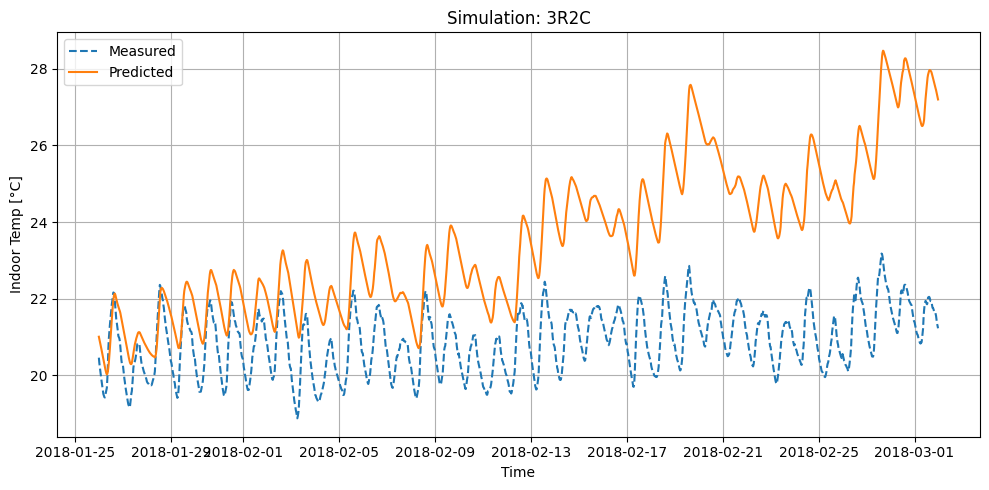

Validation RMSE: 3.0815
five last days Validation RMSE: 5.0327


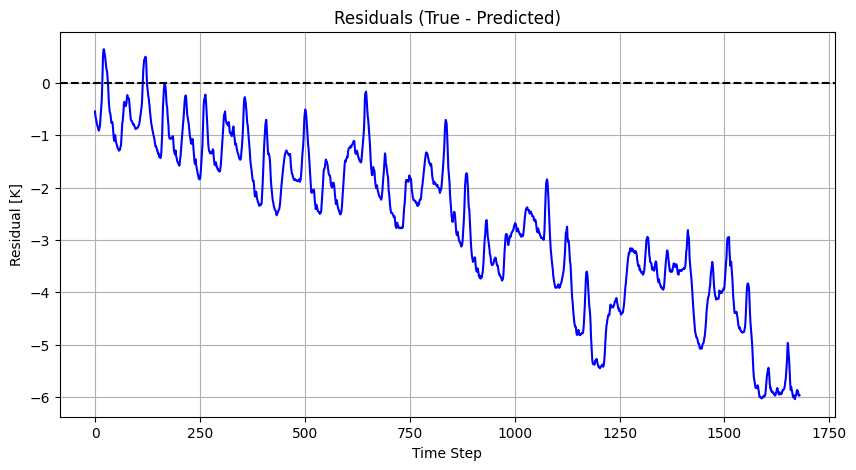

In [5]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:720+480]
val_cs2 = cs2.iloc[720+480:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

model_3r2c_cs2_25days, all_trials_3r2c_cs2_25days, best_initialization_25days, parameters_25days = run_case_study(train_df=train_cs2, surface_area=cs2_surface_area, label="Case Study 2",model_type="3R2C", bounds=bounds_cs2, trials=1)


last_index = max(model_3r2c_cs2_25days.T_in.index_set())

# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tin": model_3r2c_cs2_25days.T_in[last_index](), "Te": model_3r2c_cs2_25days.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred_3r2c_cs2_25days, t_true_3r2c_cs2_25days = simulate_and_evaluate(
    val_df=val_cs2,
    param_dict=parameters_25days,
    model_type="3R2C",
    initializations=initialize_validation,
    show_plot=True
)

# --- Results ---
print(f"Validation RMSE: {validation['RMSE']:.4f}")
rmse_3r2c_25days = np.sqrt(mean_squared_error(t_true_3r2c_cs2_25days[-240:], t_pred_3r2c_cs2_25days[-240:]))
print(f"five last days Validation RMSE: {rmse_3r2c_25days:.4f}")
# --- Plot Residuals ---
plot_residual(t_pred=t_pred_3r2c_cs2_25days, t_true=t_true_3r2c_cs2_25days)

[Trial 1] RMSE = 0.5394, Init: {'R_in_e': 0.4566139142328189, 'R_e_a': 0.7853907854316206, 'R_in_a': 0.2004741083762014, 'C_in': 257602984.7683922, 'C_e': 296614869.8621592, 'Ain': 29.263855368557294, 'Ae': 382.753295943421, 'fh': 0.17052412368729153}
 parameters: {'R_in_e': 0.9999472820543486, 'R_e_a': 0.00637153461290612, 'R_in_a': 0.0013034497792726596, 'C_in': 499984245.66429275, 'C_e': 499989898.08839655, 'Ain': 118.06198151675214, 'Ae': 0.0015428709410305011, 'fh': 0.20683873630137561, 'Objective': 0.5394264695438145, 'Solve_time': 39.3849151134491}

=== Best result ===
Best Trial #: 1
Best RMSE: 0.5394
Best initialization: {'R_in_e': 0.4566139142328189, 'R_e_a': 0.7853907854316206, 'R_in_a': 0.2004741083762014, 'C_in': 257602984.7683922, 'C_e': 296614869.8621592, 'Ain': 29.263855368557294, 'Ae': 382.753295943421, 'fh': 0.17052412368729153}
Best parameters: {'R_in_e': 0.9999472820543486, 'R_e_a': 0.00637153461290612, 'R_in_a': 0.0013034497792726596, 'C_in': 499984245.66429275, 'C

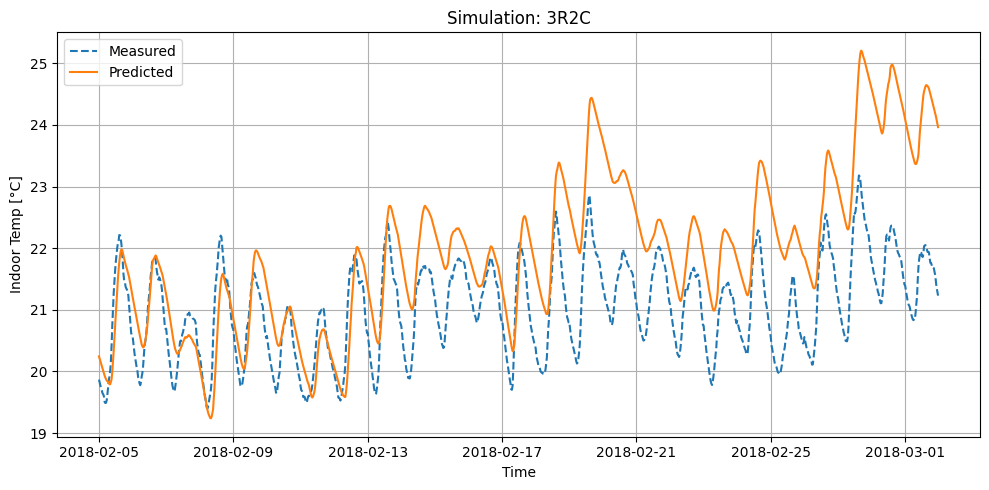

Validation RMSE: 1.2493
five last days Validation RMSE: 2.0769


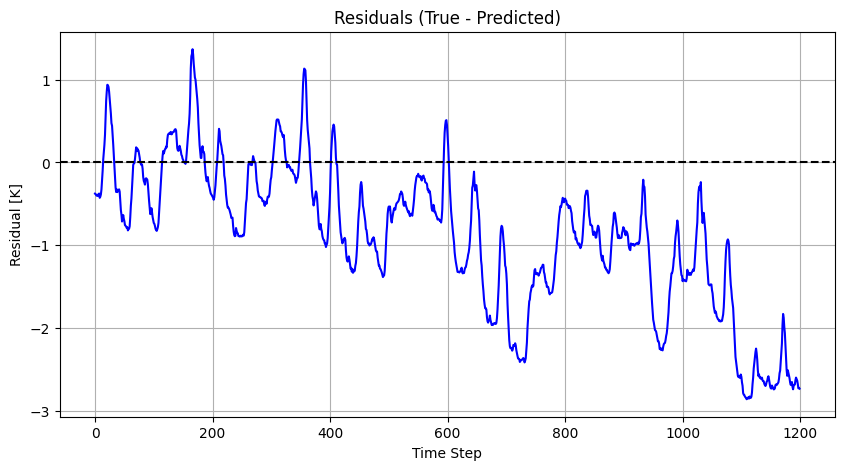

In [6]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:720+480+480]
val_cs2 = cs2.iloc[720+480+480:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

model_3r2c_cs2_35days, all_trials_3r2c_cs2_35days, best_initialization_35days, parameters_35days = run_case_study(train_df=train_cs2, surface_area=cs2_surface_area, label="Case Study 2",model_type="3R2C", bounds=bounds_cs2, trials=1)


last_index = max(model_3r2c_cs2_35days.T_in.index_set())

# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tin": model_3r2c_cs2_35days.T_in[last_index](), "Te": model_3r2c_cs2_35days.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred_3r2c_cs2_35days, t_true_3r2c_cs2_35days = simulate_and_evaluate(
    val_df=val_cs2,
    param_dict=parameters_35days,
    model_type="3R2C",
    initializations=initialize_validation,
    show_plot=True
)

# --- Results ---
print(f"Validation RMSE: {validation['RMSE']:.4f}")
rmse_3r2c_35days = np.sqrt(mean_squared_error(t_true_3r2c_cs2_35days[-240:], t_pred_3r2c_cs2_35days[-240:]))
print(f"five last days Validation RMSE: {rmse_3r2c_35days:.4f}")
# --- Plot Residuals ---
plot_residual(t_pred=t_pred_3r2c_cs2_35days, t_true=t_true_3r2c_cs2_35days)

[Trial 1] RMSE = 0.5379, Init: {'R_in_e': 0.06598654139229423, 'R_e_a': 0.9489366517160799, 'R_in_a': 0.9656664010414848, 'C_in': 404390276.7101141, 'C_e': 153002270.81751198, 'Ain': 61.53352205681044, 'Ae': 431.0668382793562, 'fh': 0.4401524937396013}
 parameters: {'R_in_e': 0.9999923236115953, 'R_e_a': 0.006654836506949176, 'R_in_a': 0.0014096860019153009, 'C_in': 499996888.4802368, 'C_e': 499996968.95261246, 'Ain': 104.67104989039558, 'Ae': 0.0009822047932012158, 'fh': 0.1898697565439276, 'Objective': 0.5378770763584392, 'Solve_time': 236.95564079284668}

=== Best result ===
Best Trial #: 1
Best RMSE: 0.5379
Best initialization: {'R_in_e': 0.06598654139229423, 'R_e_a': 0.9489366517160799, 'R_in_a': 0.9656664010414848, 'C_in': 404390276.7101141, 'C_e': 153002270.81751198, 'Ain': 61.53352205681044, 'Ae': 431.0668382793562, 'fh': 0.4401524937396013}
Best parameters: {'R_in_e': 0.9999923236115953, 'R_e_a': 0.006654836506949176, 'R_in_a': 0.0014096860019153009, 'C_in': 499996888.4802368,

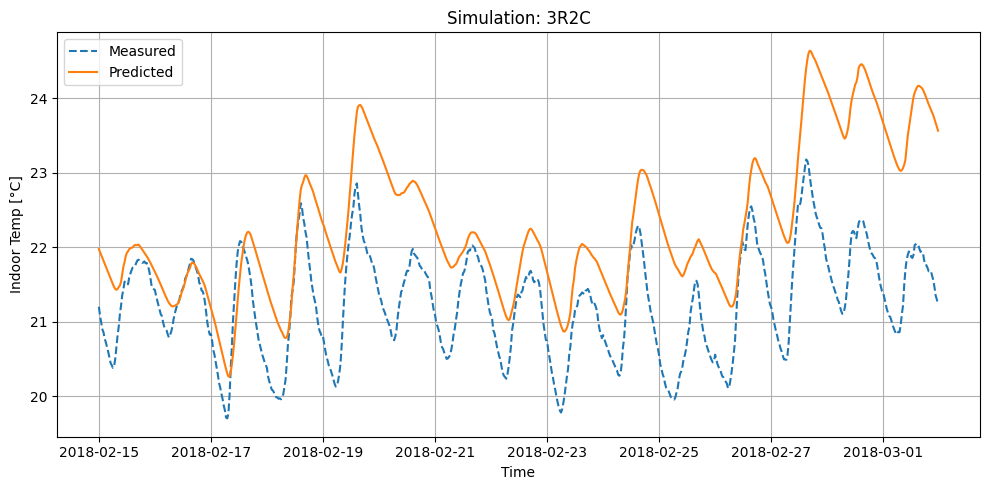

Validation RMSE: 1.2529
five last days Validation RMSE: 1.7203


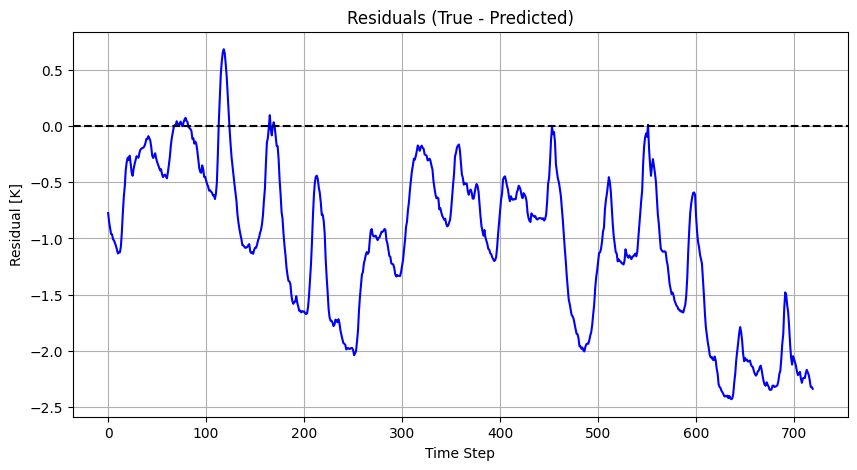

In [7]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:720+480+480+480]
val_cs2 = cs2.iloc[720+480+480+480:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

model_3r2c_cs2_45days, all_trials_3r2c_cs2_45days, best_initialization_45days, parameters_45days = run_case_study(train_df=train_cs2, surface_area=cs2_surface_area, label="Case Study 2",model_type="3R2C", bounds=bounds_cs2, trials=1)


last_index = max(model_3r2c_cs2_45days.T_in.index_set())

# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tin": model_3r2c_cs2_45days.T_in[last_index](), "Te": model_3r2c_cs2_45days.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred_3r2c_cs2_45days, t_true_3r2c_cs2_45days = simulate_and_evaluate(
    val_df=val_cs2,
    param_dict=parameters_45days,
    model_type="3R2C",
    initializations=initialize_validation,
    show_plot=True
)

# --- Results ---
print(f"Validation RMSE: {validation['RMSE']:.4f}")
rmse_3r2c_45days = np.sqrt(mean_squared_error(t_true_3r2c_cs2_45days[-240:], t_pred_3r2c_cs2_45days[-240:]))
print(f"five last days Validation RMSE: {rmse_3r2c_45days:.4f}")
# --- Plot Residuals ---
plot_residual(t_pred=t_pred_3r2c_cs2_45days, t_true=t_true_3r2c_cs2_45days)

[Trial 1] RMSE = 0.5625, Init: {'R_in_e': 0.12291619660993405, 'R_e_a': 0.49568173320115894, 'R_in_a': 0.03535413259410318, 'C_in': 454750880.63731223, 'C_e': 130131210.81840844, 'Ain': 417.3890728907802, 'Ae': 196.3780467652213, 'fh': 0.5200680211778108}
 parameters: {'R_in_e': 0.9999983232577352, 'R_e_a': 0.00723796726933264, 'R_in_a': 0.0016580943008961356, 'C_in': 499999335.5805021, 'C_e': 499999317.78888166, 'Ain': 78.25476040439447, 'Ae': 0.00030509143254470324, 'fh': 0.1798638752564309, 'Objective': 0.5625044340277883, 'Solve_time': 296.6014609336853}

=== Best result ===
Best Trial #: 1
Best RMSE: 0.5625
Best initialization: {'R_in_e': 0.12291619660993405, 'R_e_a': 0.49568173320115894, 'R_in_a': 0.03535413259410318, 'C_in': 454750880.63731223, 'C_e': 130131210.81840844, 'Ain': 417.3890728907802, 'Ae': 196.3780467652213, 'fh': 0.5200680211778108}
Best parameters: {'R_in_e': 0.9999983232577352, 'R_e_a': 0.00723796726933264, 'R_in_a': 0.0016580943008961356, 'C_in': 499999335.58050

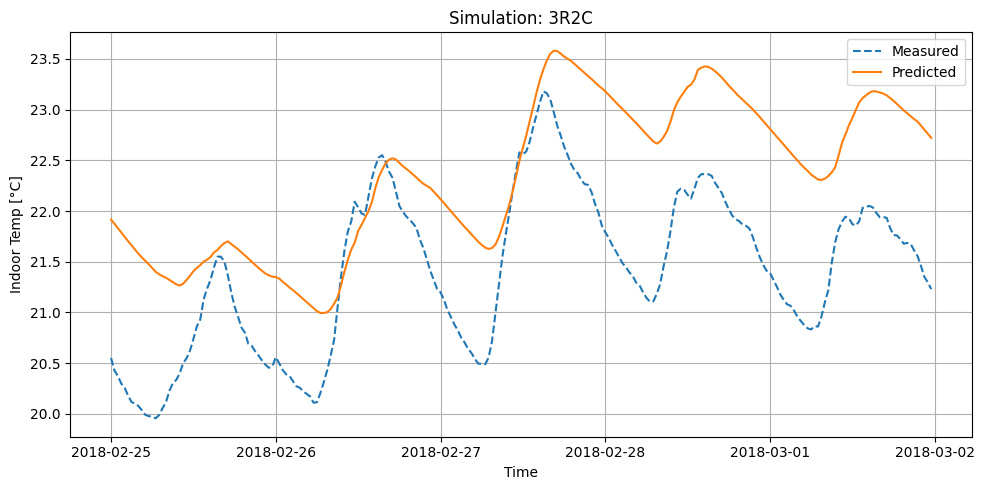

Validation RMSE: 1.0548
five last days Validation RMSE: 1.0548


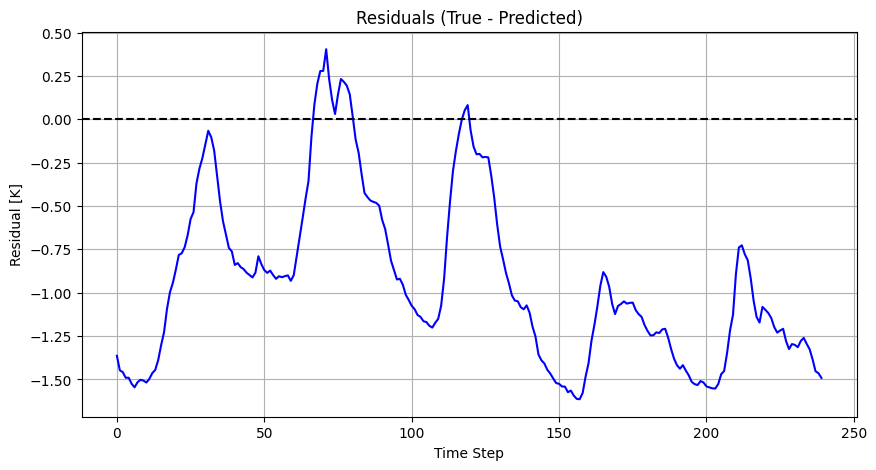

In [8]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:720+480+480+480+480]
val_cs2 = cs2.iloc[720+480+480+480+480:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

model_3r2c_cs2_55days, all_trials_3r2c_cs2_55days, best_initialization_55days, parameters_55days = run_case_study(train_df=train_cs2, surface_area=cs2_surface_area, label="Case Study 2",model_type="3R2C", bounds=bounds_cs2, trials=1)


last_index = max(model_3r2c_cs2_55days.T_in.index_set())

# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tin": model_3r2c_cs2_55days.T_in[last_index](), "Te": model_3r2c_cs2_55days.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred_3r2c_cs2_55days, t_true_3r2c_cs2_55days = simulate_and_evaluate(
    val_df=val_cs2,
    param_dict=parameters_55days,
    model_type="3R2C",
    initializations=initialize_validation,
    show_plot=True
)

# --- Results ---
print(f"Validation RMSE: {validation['RMSE']:.4f}")
rmse_3r2c_55days = np.sqrt(mean_squared_error(t_true_3r2c_cs2_55days[-240:], t_pred_3r2c_cs2_55days[-240:]))
print(f"five last days Validation RMSE: {rmse_3r2c_55days:.4f}")
# --- Plot Residuals ---
plot_residual(t_pred=t_pred_3r2c_cs2_55days, t_true=t_true_3r2c_cs2_55days)

[Trial 1] RMSE = 0.2148, Init: {'R_int_in': 0.5476168587845931, 'R_in_e': 0.18648474661447598, 'R_e_a': 0.9696454585090294, 'R_in_a': 0.7755825577143923, 'C_int': 469822072.05221754, 'C_in': 447539882.39331126, 'C_e': 299432509.4309693, 'Aint': 580.7807758771401, 'Ain': 55.75036744345908, 'Ae': 123.46928372577524, 'fh_int': 0.045227288910538066, 'fh_in': 0.32533033076326434, 'fh_e': 0.388677289689482}
 parameters: {'R_int_in': 0.002572702677096696, 'R_in_e': 0.010723758065158243, 'R_e_a': 0.001999990339535823, 'R_in_a': 0.02692727530086288, 'C_int': 327545220.821542, 'C_in': 7422799.8350269785, 'C_e': 499751343.0135494, 'Aint': 0.00010388837426976266, 'Ain': 2.483305897891012, 'Ae': 0.00012478141906366235, 'fh_int': 7.151912223212268e-08, 'fh_in': 0.006690590875153005, 'fh_e': 0.9933093376057248, 'Objective': 0.21481701491333893, 'Solve_time': 4.214605093002319}

=== Best result ===
Best Trial #: 1
Best RMSE: 0.2148
Best initialization: {'R_int_in': 0.5476168587845931, 'R_in_e': 0.1864

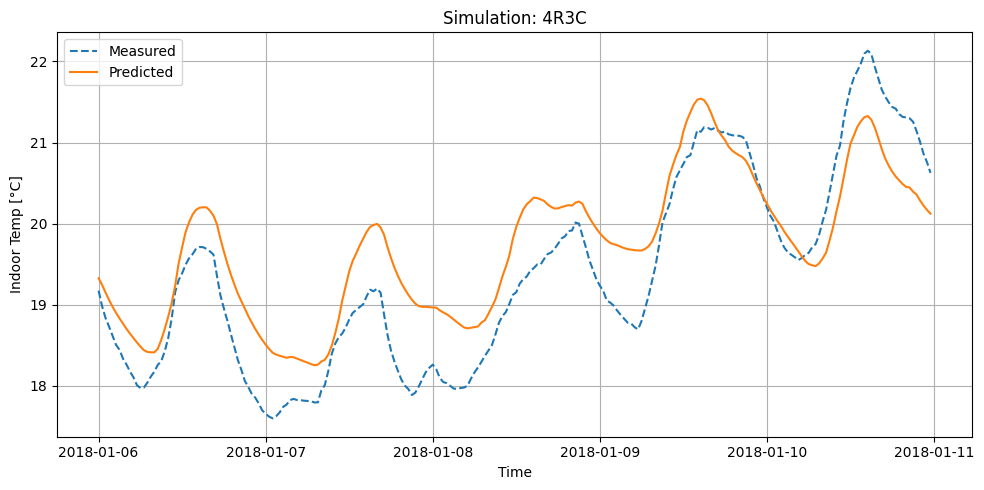

Validation RMSE: 0.6194


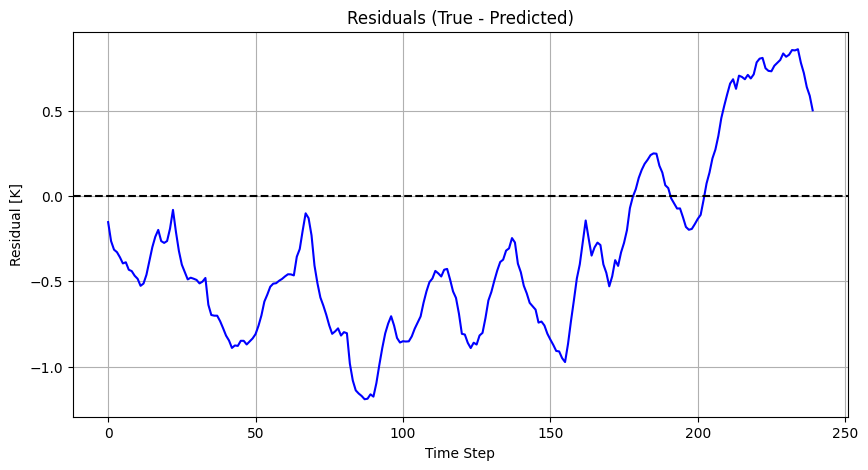

In [9]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:240]
val_cs2 = cs2.iloc[240:480]
# --- Bounds ---

bounds_cs2 = {
    "R_int_in": (0.002, 1),
    "R_in_e": (0.002, 1),
    "R_e_a": (0.002, 1),
    "R_in_a": (0.002, 1),
    "C_int": (1.2e6, 5e8),
    "C_in": (1.2e6, 5e8),
    "C_e": (1.2e6, 5e8),
    "Aint": (0.0001, 0.3 * cs2_surface_area),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh_int": (0,1),
    "fh_in": (0,1),
    "fh_e": (0,1)
}

model_4r3c_cs2_5days, all_trials_4r3c_cs2_5days, best_initialization_5days, parameters_5days = run_case_study(train_df=train_cs2, surface_area=cs2_surface_area, label="Case Study 2",model_type="4R3C", bounds=bounds_cs2, trials=1)

last_index = max(model_4r3c_cs2_5days.T_in.index_set())

# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tint": model_4r3c_cs2_5days.T_int[last_index](),"Tin": model_4r3c_cs2_5days.T_in[last_index](), "Te": model_4r3c_cs2_5days.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
    val_df=val_cs2,
    param_dict=parameters_5days,
    model_type="4R3C",
    initializations=initialize_validation,
    show_plot=True
)

# --- Results ---
print(f"Validation RMSE: {validation['RMSE']:.4f}")

# --- Plot Residuals ---
plot_residual(t_pred=t_pred, t_true=t_true)


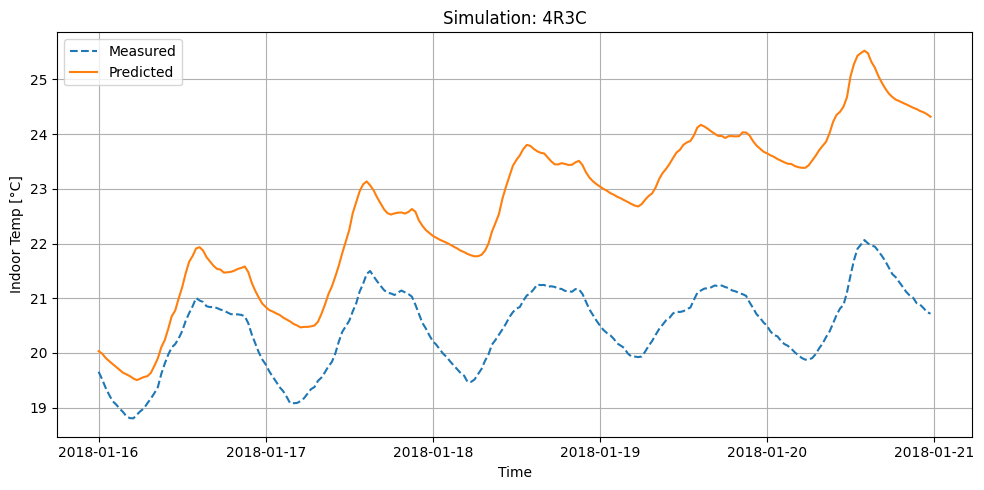

Validation RMSE: 2.3716


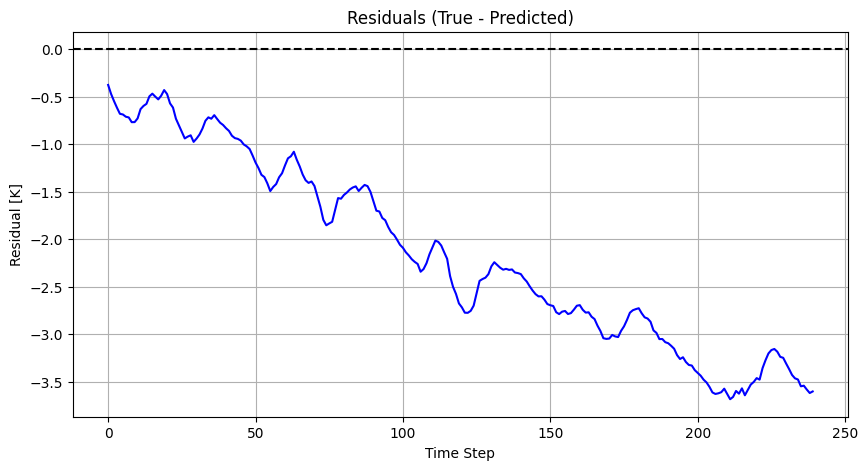

In [ ]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:240+480]
val_cs2 = cs2.iloc[240+480:480+480]
# --- Bounds ---

bounds_cs2 = {
    "R_int_in": (0.002, 1),
    "R_in_e": (0.002, 1),
    "R_e_a": (0.002, 1),
    "R_in_a": (0.002, 1),
    "C_int": (1.2e6, 5e8),
    "C_in": (1.2e6, 5e8),
    "C_e": (1.2e6, 5e8),
    "Aint": (0.0001, 0.3 * cs2_surface_area),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh_int": (0,1),
    "fh_in": (0,1),
    "fh_e": (0,1)
}

model_4r3c_cs2_15days, all_trials_4r3c_cs2_15days, best_initialization_15days, parameters_15days = run_case_study(train_df=train_cs2, surface_area=cs2_surface_area, label="Case Study 2",model_type="4R3C", bounds=bounds_cs2, trials=1)

last_index = max(model_4r3c_cs2_15days.T_in.index_set())

# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tint": model_4r3c_cs2_15days.T_int[last_index](),"Tin": model_4r3c_cs2_15days.T_in[last_index](), "Te": model_4r3c_cs2_15days.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
    val_df=val_cs2,
    param_dict=parameters_15days,
    model_type="4R3C",
    initializations=initialize_validation,
    show_plot=True
)

# --- Results ---
print(f"Validation RMSE: {validation['RMSE']:.4f}")

# --- Plot Residuals ---
plot_residual(t_pred=t_pred, t_true=t_true)


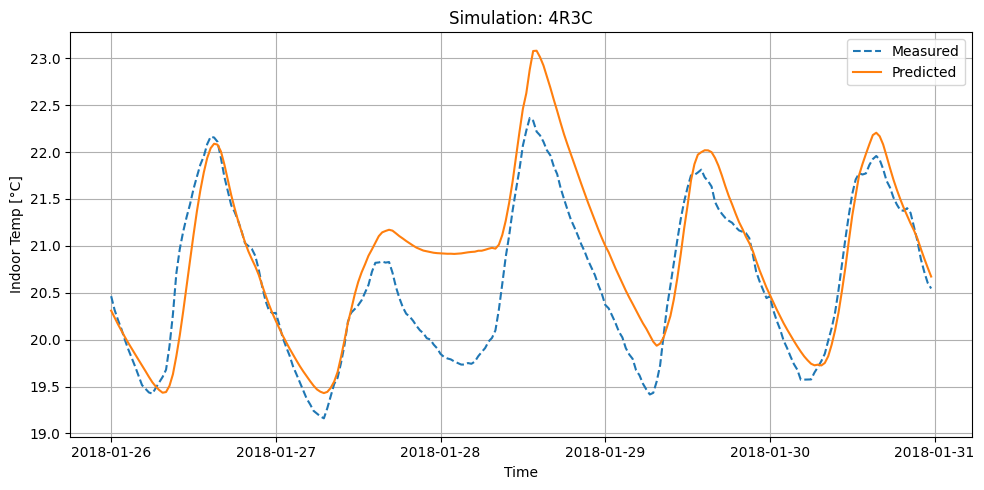

Validation RMSE: 0.4908


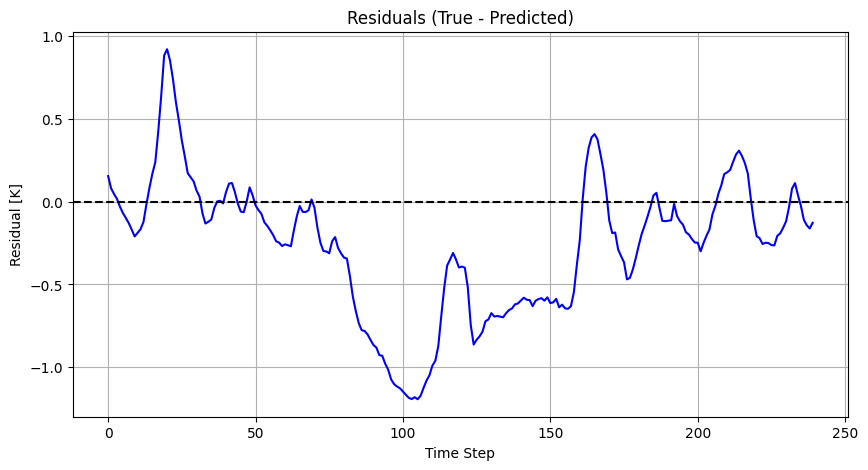

In [ ]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:240+480+480]
val_cs2 = cs2.iloc[240+480+480:480+480+480]
# --- Bounds ---

bounds_cs2 = {
    "R_int_in": (0.002, 1),
    "R_in_e": (0.002, 1),
    "R_e_a": (0.002, 1),
    "R_in_a": (0.002, 1),
    "C_int": (1.2e6, 5e8),
    "C_in": (1.2e6, 5e8),
    "C_e": (1.2e6, 5e8),
    "Aint": (0.0001, 0.3 * cs2_surface_area),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh_int": (0,1),
    "fh_in": (0,1),
    "fh_e": (0,1)
}

model_4r3c_cs2_25days, all_trials_4r3c_cs2_25days, best_initialization_25days, parameters_25days = run_case_study(train_df=train_cs2, surface_area=cs2_surface_area, label="Case Study 2",model_type="4R3C", bounds=bounds_cs2, trials=1)

last_index = max(model_4r3c_cs2_25days.T_in.index_set())

# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tint": model_4r3c_cs2_25days.T_int[last_index](),"Tin": model_4r3c_cs2_25days.T_in[last_index](), "Te": model_4r3c_cs2_25days.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
    val_df=val_cs2,
    param_dict=parameters_25days,
    model_type="4R3C",
    initializations=initialize_validation,
    show_plot=True
)

# --- Results ---
print(f"Validation RMSE: {validation['RMSE']:.4f}")

# --- Plot Residuals ---
plot_residual(t_pred=t_pred, t_true=t_true)


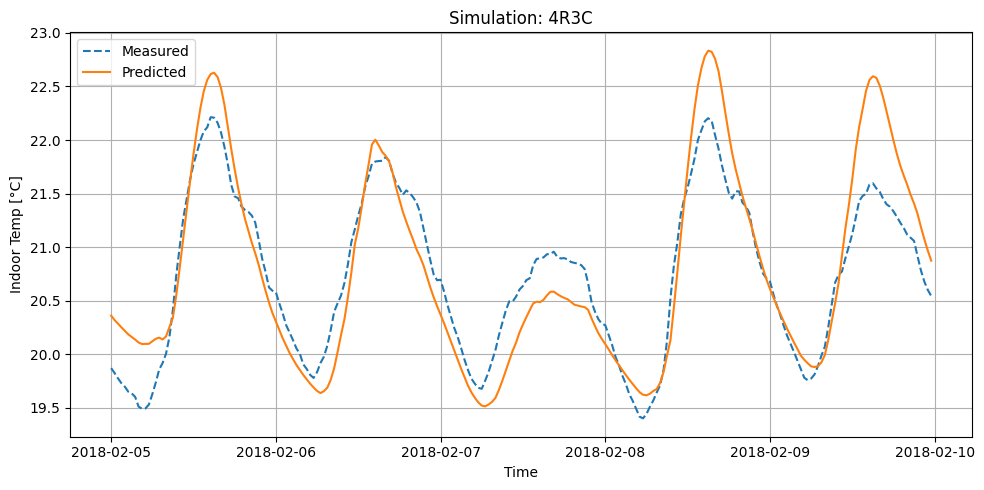

Validation RMSE: 0.3666


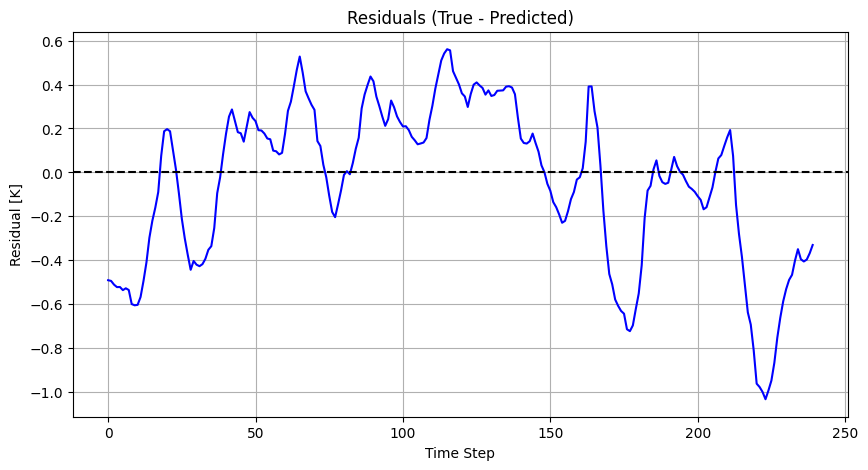

In [ ]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:240+480+480+480]
val_cs2 = cs2.iloc[240+480+480+480:480+480+480+480]
# --- Bounds ---

bounds_cs2 = {
    "R_int_in": (0.002, 1),
    "R_in_e": (0.002, 1),
    "R_e_a": (0.002, 1),
    "R_in_a": (0.002, 1),
    "C_int": (1.2e6, 5e8),
    "C_in": (1.2e6, 5e8),
    "C_e": (1.2e6, 5e8),
    "Aint": (0.0001, 0.3 * cs2_surface_area),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh_int": (0,1),
    "fh_in": (0,1),
    "fh_e": (0,1)
}

model_4r3c_cs2_35days, all_trials_4r3c_cs2_35days, best_initialization_35days, parameters_35days = run_case_study(train_df=train_cs2, surface_area=cs2_surface_area, label="Case Study 2",model_type="4R3C", bounds=bounds_cs2, trials=1)

last_index = max(model_4r3c_cs2_35days.T_in.index_set())

# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tint": model_4r3c_cs2_35days.T_int[last_index](),"Tin": model_4r3c_cs2_35days.T_in[last_index](), "Te": model_4r3c_cs2_35days.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
    val_df=val_cs2,
    param_dict=parameters_35days,
    model_type="4R3C",
    initializations=initialize_validation,
    show_plot=True
)

# --- Results ---
print(f"Validation RMSE: {validation['RMSE']:.4f}")

# --- Plot Residuals ---
plot_residual(t_pred=t_pred, t_true=t_true)


[Trial 1] RMSE = 0.5226, Init: {'R_int_in': 0.8085041388052882, 'R_in_e': 0.6341369489974026, 'R_e_a': 0.8717176690073423, 'R_in_a': 0.8040647327453162, 'C_int': 94261145.37235467, 'C_in': 446408428.4468009, 'C_e': 270223910.26752657, 'Aint': 508.6873170093439, 'Ain': 564.5375293426707, 'Ae': 200.34225743192675, 'fh_int': 0.11005192452767676, 'fh_in': 0.22793516254194168, 'fh_e': 0.4271077886262563}
 parameters: {'R_int_in': 0.00820534696261484, 'R_in_e': 0.9999921509617263, 'R_e_a': 0.004422756522474525, 'R_in_a': 0.002007868762381279, 'C_int': 150551129.81898203, 'C_in': 357355596.89558244, 'C_e': 273543397.0156652, 'Aint': 0.00010438785713524339, 'Ain': 79.13601749370916, 'Ae': 0.001091202550580914, 'fh_int': 6.951509647399281e-09, 'fh_in': 0.15310953407205283, 'fh_e': 0.8468904589764376, 'Objective': 0.5225512880833437, 'Solve_time': 468.70477318763733}

=== Best result ===
Best Trial #: 1
Best RMSE: 0.5226
Best initialization: {'R_int_in': 0.8085041388052882, 'R_in_e': 0.634136948

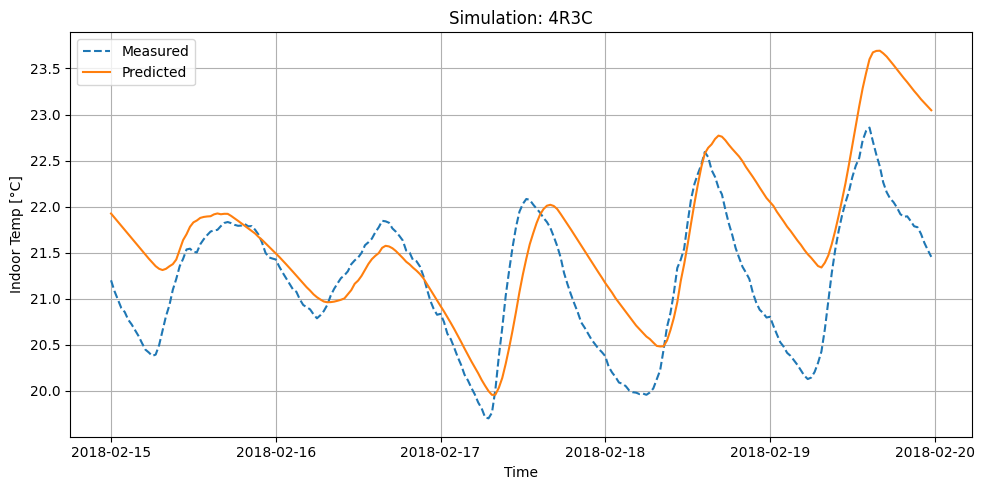

Validation RMSE: 0.7205


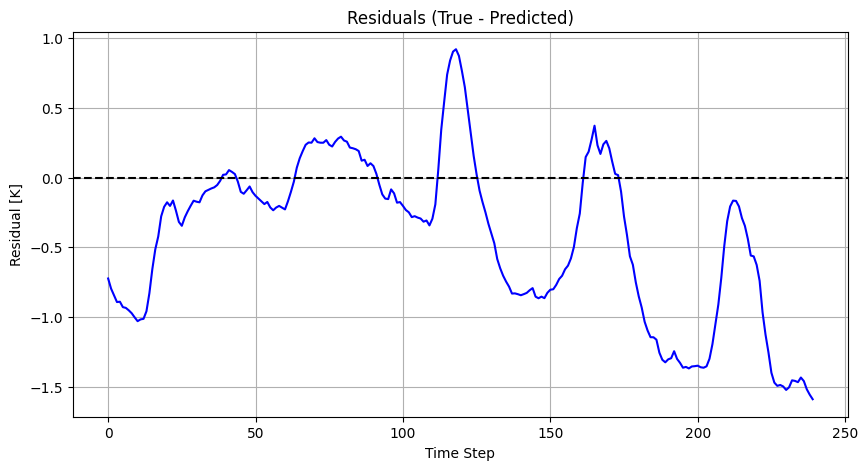

In [17]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:240+480+480+480+480]
val_cs2 = cs2.iloc[240+480+480+480+480:480+480+480+480+480]
# --- Bounds ---

bounds_cs2 = {
    "R_int_in": (0.002, 1),
    "R_in_e": (0.002, 1),
    "R_e_a": (0.002, 1),
    "R_in_a": (0.002, 1),
    "C_int": (1.2e6, 5e8),
    "C_in": (1.2e6, 5e8),
    "C_e": (1.2e6, 5e8),
    "Aint": (0.0001, 0.3 * cs2_surface_area),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh_int": (0,1),
    "fh_in": (0,1),
    "fh_e": (0,1)
}

model_4r3c_cs2_45days, all_trials_4r3c_cs2_45days, best_initialization_45days, parameters_45days = run_case_study(train_df=train_cs2, surface_area=cs2_surface_area, label="Case Study 2",model_type="4R3C", bounds=bounds_cs2, trials=1)

last_index = max(model_4r3c_cs2_45days.T_in.index_set())

# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tint": model_4r3c_cs2_45days.T_int[last_index](),"Tin": model_4r3c_cs2_45days.T_in[last_index](), "Te": model_4r3c_cs2_45days.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
    val_df=val_cs2,
    param_dict=parameters_45days,
    model_type="4R3C",
    initializations=initialize_validation,
    show_plot=True
)

# --- Results ---
print(f"Validation RMSE: {validation['RMSE']:.4f}")

# --- Plot Residuals ---
plot_residual(t_pred=t_pred, t_true=t_true)


In [18]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:240+480+480+480+480+480]
val_cs2 = cs2.iloc[240+480+480+480+480+480:480+480+480+480+480+480]
# --- Bounds ---

bounds_cs2 = {
    "R_int_in": (0.002, 1),
    "R_in_e": (0.002, 1),
    "R_e_a": (0.002, 1),
    "R_in_a": (0.002, 1),
    "C_int": (1.2e6, 5e8),
    "C_in": (1.2e6, 5e8),
    "C_e": (1.2e6, 5e8),
    "Aint": (0.0001, 0.3 * cs2_surface_area),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh_int": (0,1),
    "fh_in": (0,1),
    "fh_e": (0,1)
}

model_4r3c_cs2_55days, all_trials_4r3c_cs2_55days, best_initialization_55days, parameters_55days = run_case_study(train_df=train_cs2, surface_area=cs2_surface_area, label="Case Study 2",model_type="4R3C", bounds=bounds_cs2, trials=1)

last_index = max(model_4r3c_cs2_55days.T_in.index_set())

# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tint": model_4r3c_cs2_55days.T_int[last_index](),"Tin": model_4r3c_cs2_55days.T_in[last_index](), "Te": model_4r3c_cs2_55days.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
    val_df=val_cs2,
    param_dict=parameters_55days,
    model_type="4R3C",
    initializations=initialize_validation,
    show_plot=True
)

# --- Results ---
print(f"Validation RMSE: {validation['RMSE']:.4f}")

# --- Plot Residuals ---
plot_residual(t_pred=t_pred, t_true=t_true)


KeyboardInterrupt: 